___

<center><h1>Big-Five Personality Test</h1></center>

___

<center><strong>Teacher:</strong> John William Branch</center>

___

<center><strong>Students:</strong></center>
<center>Mateo González <sup><strong><i>a</i></strong></sup></center>
<center>Alejandro Uribe <sup><strong><i>b</i></strong></sup></center><br>
<i><center><sup><strong>a</strong></sup>1037639531; <sup><strong>b</strong></sup>1037627601</center></i><br>
<center>July 2020</center>

___
<center><strong>Modified and Fixed for Data 490</strong></center>
<center>Team 1: Ryan, Moncef, and Ethan<sup><strong>
<center>April 2022</center>


Hit Shift + Enter to run a cell

In [ ]:
# Common modules
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt

# Data Preparation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder, label_binarize

# Modelling
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Testing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, roc_curve, roc_auc_score, classification_report

# Introduction
The current project was developed following CRISP-DM workflow. *CRoss-Industry Standard Process for Data Mining* (CRISP-DM) is the most commonly used methodology for analytics, data mining and analytics projects which provides an overview of the life cycle of a data mining project. CRISP-DM is a robust industry standard process which guides the analyst through a set of phases which cover all possible data mining situations [1]. The Figure 1 shows the CRISP-DM Methodology.  
<center><img src="assets/CRISPDM.png" alt="CRISPDM" style="width: 500px;"/></center>
<center><i>Figure 1. CRISP-DM Methodology.<br>Source: [2].</i></center>

# Business Understanding
The first phase is the most important in the lifecycle of the project, the analysts can set expectations and success from the thorough understanding of the business requirements.
The problem at hand arises from the need to group the people according to their personality, thus simplifying the understanding of human mind. The “Big Five Personality Test” have widespread since its release in XX century due to its scalability and ease of distribution.  

The optimal solution is a model able to classify the trait with max value of the test, given the answers of this one. The Figure 2 shows the schedule followed by the team to carry out the project.

<center><img src="assets/ProjectSchedule.png" alt="ProjectSchedule" style="width: 950px;"/></center>
<center><i>Figure 2. Project Schedule.</i></center>

# Data Understanding
This phase involves collecting the data, describing its attributes and performing the data exploratory analysis. Firstly, the data can be found in open data sources, e.g., Kaggle [3] or can be purchased in third party companies.The data used to develop this project was provided by the instructors of the subject. 

## Data Load
Firstly, this step includes the differentiation of `answers` and `time` features, followed by a parsing of the records to reduce the memory usage.

answer_columns =    [f"EXT{i}" for i in range(1, 11)] + \
                    [f"EST{i}" for i in range(1, 11)] + \
                    [f"AGR{i}" for i in range(1, 11)] + \
                    [f"CSN{i}" for i in range(1, 11)] + \
                    [f"OPN{i}" for i in range(1, 11)]

time_columns =      [f"EXT{i}_E" for i in range(1, 11)] + \
                    [f"EST{i}_E" for i in range(1, 11)] + \
                    [f"AGR{i}_E" for i in range(1, 11)] + \
                    [f"CSN{i}_E" for i in range(1, 11)] + \
                    [f"OPN{i}_E" for i in range(1, 11)]

float32_columns = answer_columns + time_columns

float32_types = {k: 'float32' for k in float32_columns}
dtype = {**float32_types}

df = pd.read_csv('\Users\Michael Downey\Documents\GitHub\Big5\dataBigFivePersonalityTest-TrainSet.csv', parse_dates = ['dateload'], dtype = dtype)
df.rename(columns = {'Unnamed: 0' : 'id'}, inplace = True)

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = 999

df.head()

ADD COLUMN DOCUMENTATION

## Data Description
Secondly, an initial analysis on the data will provided the very first insights about it such as its nature, volume, and features. Finally, the Exploratory Data Analysis will be carried out in order to understand relationships between variables.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


**NOTE**: Right click the "Team 1 (Ethan,Ryan, Mounceff)" folder from Shared with me and click "add to drive". Add it to the home screen of your drive

In [ ]:
answer_columns = [f"EXT{i}" for i in range(1, 11)] + [f"EST{i}" for i in range(1, 11)] + [f"AGR{i}" for i in range(1, 11)] +[f"CSN{i}" for i in range(1, 11)] + [f"OPN{i}" for i in range(1, 11)]
time_columns = [f"EXT{i}_E" for i in range(1, 11)] +[f"EST{i}_E" for i in range(1, 11)] +[f"AGR{i}_E" for i in range(1, 11)] +[f"CSN{i}_E" for i in range(1, 11)] +[f"OPN{i}_E" for i in range(1, 11)]

float32_columns = answer_columns + time_columns
float32_types = {k: 'float32' for k in float32_columns}
dtype = {**float32_types}

In [ ]:
# imports the data
df = pd.read_csv('/gdrive/My Drive/Team 1 (Ethan,Ryan, Mounceff)/BigFivePersonalityTest-TrainSetWithoutTarget.csv', 
                 parse_dates = ['dateload'], dtype = dtype)
df.rename(columns = {'Unnamed: 0' : 'id'}, inplace = True)
pd.options.display.float_format = "{:,.2f}".format 
pd.options.display.max_columns = 999
df.head()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,0,1,3.00,3.00,5.00,3.00,4.00,1.00,3.00,2.00,4.00,3.00,2.00,4.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,4.00,5.00,1.00,5.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,2.00,5.00,3.00,4.00,1.00,5.00,1.00,4.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,4.00,5.00,5.00,"8,203.00","3,608.00","3,519.00","19,352.00","2,752.00","3,026.00","3,646.00","12,234.00","32,631.00","3,910.00","8,263.00","4,735.00","6,464.00","6,816.00","9,074.00","2,894.00","6,010.00","3,334.00","3,306.00","1,890.00","11,783.00","2,262.00","2,815.00","4,583.00","3,538.00","22,801.00","4,184.00","3,285.00","3,180.00","5,193.00","1,960.00","7,224.00","1,776.00","5,152.00","7,877.00","4,208.00","2,624.00","18,514.00","4,125.00","5,463.00","3,138.00","4,370.00","3,328.00","2,472.00","2,789.00","2,458.00","2,422.00","2,544.00","3,927.00","2,398.00",2018-04-23 11:27:55,"1,670.00",939.00,5.00,301.00,12,3,US,40.7605,-73.9933
1,1,2,3.00,2.00,4.00,2.00,3.00,2.00,3.00,2.00,4.00,2.00,5.00,2.00,4.00,2.00,2.00,2.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,4.00,2.00,4.00,1.00,3.00,2.00,4.00,2.00,4.00,4.00,5.00,2.00,4.00,2.00,4.00,2.00,4.00,5.00,4.00,4.00,"15,486.00","1,452.00","1,603.00","1,749.00","2,668.00","1,199.00","3,082.00","1,317.00","6,120.00","1,435.00","2,263.00","2,567.00","1,479.00","1,951.00","5,282.00","2,768.00","1,133.00","3,851.00",425.00,"1,420.00","4,267.00","3,049.00","3,147.00","2,336.00","1,496.00","1,168.00","3,201.00","2,831.00","2,181.00","2,167.00","2,470.00","2,852.00","2,266.00","2,616.00","1,970.00","2,077.00","1,466.00","1,852.00","2,301.00","3,212.00",851.00,735.00,"1,570.00","4,048.00","1,605.00","2,019.00","1,568.00","3,683.00","1,075.00","1,668.00",2016-04-27 14:02:34,"1,366.00",768.00,5.00,130.00,10,3,US,32.7371,-117.0881
2,2,3,5.00,1.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,3.00,5.00,5.00,5.00,1.00,3.00,5.00,1.00,3.00,1.00,1.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,5.00,4.00,1.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,5.00,3.00,5.00,3.00,5.00,1.00,5.00,3.00,5.00,5.00,"19,853.00","6,505.00","6,935.00","8,447.00","6,464.00","17,488.00","10,392.00","22,367.00","7,401.00","15,608.00","25,687.00","5,392.00","5,584.00","5,808.00","10,303.00","16,976.00","7,407.00","7,616.00","12,000.00","10,823.00","17,519.00","15,168.00","7,456.00","7,008.00","8,929.00","10,167.00","6,616.00","21,513.00","26,255.00","8,120.00","20,847.00","7,415.00","6,152.00","7,136.00","15,383.00","16,760.00","4,728.00","12,231.00","5,408.00","29,072.00","18,240.00","8,553.00","5,648.00","8,616.00","8,265.00","10,624.00","13,953.00","6,712.00","8,480.00","7,105.00",2016-11-12 12:12:23,"1,920.00","1,080.00",2.00,581.00,5,2,US,38.0,-97.0
3,3,4,4.00,2.00,4.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,5.00,1.00,5.00,1.00,5.00,2.00,4.00,5.00,4.00,4.00,3.00,5.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,4.00,4.00,"38,202.00","6,704.00","7,805.00","13,770.00","3,334.00","4,088.00","8,471.00","4,357.00","3,693.00","7,312.00","18,601.00","2,764.00","14,820.00","5,364.00","3,514.00","8,580.00","7,579.00","4,636.00","5,499.00","2,755.00","1,079.00","4,768.00","3,328.00","3,726.00","10,242.00","3,680.00","6,890.00","3,288.00","4,563.00","3,299.00","8,539.00","14,348.0

### Volume of the data

In [ ]:
print(f'The dataset has {df.shape[0]} records and {df.shape[1]} features.')

The dataset has 50768 records and 112 features.


### Metadata of the Dataset
The following step provides information about the data, such as:

- Range Index
- Columns
- Data Types
- Memory Usage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50768 entries, 0 to 50767
Columns: 112 entries, id to long_appx_lots_of_err
dtypes: datetime64[ns](1), float32(100), float64(4), int64(4), object(3)
memory usage: 24.0+ MB


A reduction in memory usage was exhibited, from 605MB in disk to 456MB in RAM.

In [ ]:
df.describe()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,"50,768.00","50,768.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,664.00","50,664.00","50,664.00","50,695.00","50,768.00","50,768.00"
mean,"25,383.50","25,384.50",2.65,2.78,3.29,3.14,3.27,2.41,2.77,3.42,2.96,3.55,3.28,3.17,3.85,2.66,2.83,2.83,3.05,2.68,3.08,2.78,2.26,3.83,2.27,3.92,2.27,3.73,2.20,3.68,3.78,3.59,3.30,2.94,3.97,2.62,2.62,2.84,3.70,2.46,3.19,3.59,3.66,2.07,4.00,2.00,3.79,1.90,3.98,3.18,4.13,3.96,"72,634.01","17,319.31","9,656.71","10,620.91","5,997.47","6,181.11","7,176.72","5,939.90","5,561.90","4,770.64","6,067.92","8,160.09","6,268.50","50,600.02","9,789.59","5,204.65","9,553.24","5,334.25","6,668.80","4,651.77","15,842.14","11,509.55","6,370.32","8,186.14","8,666.03","7,102.98","5,707.91","6,237.04","5,610.37","5,050.19","12,028.61","11,778.94","13,099.01","9,463.29","7,204.67","13,786.53","4,453.48","15,577.36","4,142.43","6,679.29","4,835.44","8,146.84","8,235.37","7,415.59","6,617.10","7,287.60","5,955.66","4,531.79","5,190.05","3,577.17","1,150.50",825.21,990.44,959.34,"1,264.71",10.54
std,"14,655.60","14,655.60",1.27,1.33,1.21,1.24,1.28,1.23,1.40,1.28,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.32,1.29,1.34,1.29,1.32,1.34,1.14,1.28,1.13,1.17,1.23,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.41,1.13,1.14,1.28,1.05,1.15,1.11,1.10,1.09,0.99,1.11,1.01,1.25,1.04,1.04,"2,065,737.62","1,618,900.50","479,616.81","514,481.12","178,302.27","206,846.72","123,991.25","88,652.50","75,619.80","46,375.21","92,534.62","347,021.91","229,783.14","9,541,721.00","489,636.91","35,383.57","839,341.88","70,623.13","367,055.44","78,981.98","975,119.12","634,763.50","136,101.11","317,604.25","386,764.66","458,949.91","38,072.70","65,241.64","154,149.11","16,940.63","805,345.88","493,935.56","1,439,559.12","494,481.78","93,610.83","985,499.62","51,652.23","1,175,716.00","13,531.49","34,662.89","39,024.14","91,062.09","450,323.03","102,171.60","293,971.91","301,314.56","159,297.56","26,967.44","59,245.00","30,548.82",560.90,180.05,"29,990.61","58,175.86","58,531.36",40.52
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

### Features in the Dataset

In [ ]:
df.columns.values

array(['id', 'ID', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5',
       'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3',
       'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1',
       'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9',
       'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7',
       'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E',
       'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E',
       'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E',
       'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E',
       'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E',
       'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
       'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E',
       'OPN7_E', 'OPN

In [ ]:
df.describe()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,"50,768.00","50,768.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,695.00","50,664.00","50,664.00","50,664.00","50,695.00","50,768.00","50,768.00"
mean,"25,383.50","25,384.50",2.65,2.78,3.29,3.14,3.27,2.41,2.77,3.42,2.96,3.55,3.28,3.17,3.85,2.66,2.83,2.83,3.05,2.68,3.08,2.78,2.26,3.83,2.27,3.92,2.27,3.73,2.20,3.68,3.78,3.59,3.30,2.94,3.97,2.62,2.62,2.84,3.70,2.46,3.19,3.59,3.66,2.07,4.00,2.00,3.79,1.90,3.98,3.18,4.13,3.96,"72,634.01","17,319.31","9,656.71","10,620.91","5,997.47","6,181.11","7,176.72","5,939.90","5,561.90","4,770.64","6,067.92","8,160.09","6,268.50","50,600.02","9,789.59","5,204.65","9,553.24","5,334.25","6,668.80","4,651.77","15,842.14","11,509.55","6,370.32","8,186.14","8,666.03","7,102.98","5,707.91","6,237.04","5,610.37","5,050.19","12,028.61","11,778.94","13,099.01","9,463.29","7,204.67","13,786.53","4,453.48","15,577.36","4,142.43","6,679.29","4,835.44","8,146.84","8,235.37","7,415.59","6,617.10","7,287.60","5,955.66","4,531.79","5,190.05","3,577.17","1,150.50",825.21,990.44,959.34,"1,264.71",10.54
std,"14,655.60","14,655.60",1.27,1.33,1.21,1.24,1.28,1.23,1.40,1.28,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.32,1.29,1.34,1.29,1.32,1.34,1.14,1.28,1.13,1.17,1.23,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.41,1.13,1.14,1.28,1.05,1.15,1.11,1.10,1.09,0.99,1.11,1.01,1.25,1.04,1.04,"2,065,737.62","1,618,900.50","479,616.81","514,481.12","178,302.27","206,846.72","123,991.25","88,652.50","75,619.80","46,375.21","92,534.62","347,021.91","229,783.14","9,541,721.00","489,636.91","35,383.57","839,341.88","70,623.13","367,055.44","78,981.98","975,119.12","634,763.50","136,101.11","317,604.25","386,764.66","458,949.91","38,072.70","65,241.64","154,149.11","16,940.63","805,345.88","493,935.56","1,439,559.12","494,481.78","93,610.83","985,499.62","51,652.23","1,175,716.00","13,531.49","34,662.89","39,024.14","91,062.09","450,323.03","102,171.60","293,971.91","301,314.56","159,297.56","26,967.44","59,245.00","30,548.82",560.90,180.05,"29,990.61","58,175.86","58,531.36",40.52
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

Further information about the columns can be found in the table below.  

**Question Columns**  
Find below further information about the question columns  

|Feature| Question|
|:-:|:---|
|EXT1|I am the life of the party
|EXT2|I don't talk a lot
|EXT3|I feel comfortable around people
|EXT4|I keep in the background
|EXT5|I start conversations
|EXT6|I have little to say
|EXT7|I talk to a lot of different people at parties
|EXT8|I don't like to draw attention to myself
|EXT9|I don't mind being the center of attention
|EXT10|I am quiet around strangers
|EST1|I get stressed out easily
|EST2|I am relaxed most of the time
|EST3|I worry about things
|EST4|I seldom feel blue
|EST5|I am easily disturbed
|EST6|I get upset easily
|EST7|I change my mood a lot
|EST8|I have frequent mood swings
|EST9|I get irritated easily
|EST10|I often feel blue
|AGR1|I feel little concern for others
|AGR2|I am interested in people
|AGR3|I insult people
|AGR4|I sympathize with others' feelings
|AGR5|I am not interested in other people's problems
|AGR6|I have a soft heart
|AGR7|I am not really interested in others
|AGR8|I take time out for others
|AGR9|I feel others' emotions
|AGR10|I make people feel at ease
|CSN1|I am always prepared
|CSN2|I leave my belongings around
|CSN3|I pay attention to details
|CSN4|I make a mess of things
|CSN5|I get chores done right away
|CSN6|I often forget to put things back in their proper place
|CSN7|I like order
|CSN8|I shirk my duties
|CSN9|I follow a schedule
|CSN10|I am exacting in my work
|OPN1|I have a rich vocabulary
|OPN2|I have difficulty understanding abstract ideas
|OPN3|I have a vivid imagination
|OPN4|I am not interested in abstract ideas
|OPN5|I have excellent ideas
|OPN6|I do not have a good imagination
|OPN7|I am quick to understand things
|OPN8|I use difficult words
|OPN9|I spend time reflecting on things
|OPN10|I am full of ideas

<center><i>The scale was labeled 1=Disagree, 3=Neutral, 5=Agree</i></center>

The time spent on each question is also recorded in milliseconds These are the variables ending in **\_E**  

**Other Columns**  

|Feature|Description|
|:-:|:---|
|dateload|The timestamp when the survey was started
|screenw|The width the of user's screen in pixels
|screenh|The height of the user's screen in pixels
|introelapse|The time in seconds spent on the landing page
|testelapse|The time in seconds spent on the page with the survey questions
|endelapse|The time in seconds spent on the finalization page 
|IPC|The number of records from the user's IP address in the dataset
|country|The country*
|lat_appx_lots_of_err|Approximate latitude of user*
|long_appx_lots_of_err|Approximate longitude of user*
|target|The trait with max value of the test

<center><i>*Determined by technical information</i></center>

The data provider suggested to keep the values where `IPC = 1` because higher values correspond to either multiple submissions or tests in shared network.

In [ ]:
df.columns.values

array(['id', 'ID', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5',
       'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3',
       'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1',
       'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9',
       'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7',
       'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E',
       'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E',
       'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E',
       'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E',
       'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E',
       'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
       'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E',
       'OPN7_E', 'OPN

In [ ]:
def filter_IPC(df):
    return df[df['IPC']==1]

In [ ]:
# Remove records that have multiple test associated with the same IP address
df = filter_IPC(df)

### Duplicated Values
Duplicated values were deleted, only the first record was kept.

In [ ]:
def drop_dupl(df):
    df.drop_duplicates(keep = 'first', inplace = True)
    return df

In [ ]:
print(df.duplicated().sum(), "duplicates before processing")
df = drop_dupl(df)
print(df.duplicated().sum(), "duplicates after processing")

0 duplicates before processing
0 duplicates after processing


### Missing Values
All answers labeled as zero will be considered as nulls, this records could be corrupted and will not add valuable information to model.

In [ ]:
def missing_answers(df,answer_columns):
    df[answer_columns] = df[answer_columns].replace(to_replace = 0, value = np.nan)
    return df

In [ ]:
# remove any answer of 0 (0 is not an option)
df = missing_answers(df,answer_columns)
df.isnull().sum()[df.isnull().sum()>0].to_frame('Nulls %').sort_values(by = 'Nulls %')/len(df)*100

,Nulls %
country,0.01
AGR4_E,0.12
AGR3_E,0.12
AGR2_E,0.12
AGR1_E,0.12
...,...
EST4,1.06
EXT5,1.06
EST6,1.10
AGR6,1.13


The NaN values represent the 1.3% of the dataset in the worst case, then this values will be dropped.

In [ ]:
def drop_missing(df):
    df.dropna(axis = 0, inplace = True)
    return df

In [ ]:
# Remove the records with null values
df = drop_missing(df)

### Descriptive Analysis
This step provides the statistics of each column.

In [ ]:
df.describe()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,"30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00","30,131.00"
mean,"25,404.87","25,405.87",2.58,2.85,3.24,3.22,3.25,2.42,2.71,3.48,2.95,3.62,3.30,3.18,3.88,2.66,2.85,2.86,3.05,2.69,3.09,2.86,2.24,3.85,2.28,3.94,2.30,3.75,2.24,3.68,3.78,3.59,3.32,3.01,4.00,2.65,2.58,2.87,3.73,2.49,3.15,3.62,3.79,2.02,4.06,1.95,3.83,1.88,4.06,3.29,4.22,4.00,"76,790.19","22,625.15","9,170.29","12,096.42","4,643.18","5,402.00","6,884.35","5,773.50","5,760.22","4,979.65","5,408.85","8,871.68","6,887.40","9,027.09","10,627.41","5,350.37","6,388.08","4,948.88","4,347.68","4,501.48","11,748.20","12,981.38","5,548.52","5,181.39","7,150.31","5,057.88","5,406.03","6,355.18","5,596.77","4,913.51","7,076.53","10,329.69","7,568.80","6,364.66","7,518.72","10,550.31","4,221.14","8,798.67","4,195.11","6,513.38","4,729.26","8,161.35","8,455.91","6,593.78","7,360.12","5,618.87","6,074.83","4,559.97","5,264.37","3,256.69","1,119.70",821.25,"1,053.06",697.93,"1,630.87",1.00
std,"14,653.04","14,653.04",1.24,1.31,1.19,1.21,1.24,1.21,1.36,1.24,1.33,1.26,1.31,1.19,1.12,1.22,1.25,1.29,1.26,1.32,1.27,1.30,1.30,1.09,1.27,1.07,1.16,1.17,1.12,1.05,1.14,1.04,1.12,1.37,0.99,1.23,1.24,1.40,1.07,1.13,1.25,1.00,1.06,1.08,1.03,1.06,0.93,1.07,0.92,1.21,0.94,0.98,"2,315,997.00","2,040,614.12","370,590.34","652,971.75","22,756.41","85,453.60","83,397.08","69,500.37","97,314.25","59,636.40","58,342.93","432,128.06","291,457.00","357,422.22","593,967.56","41,648.68","291,989.88","43,360.51","38,018.26","79,876.31","306,796.44","708,536.88","49,348.40","26,107.06","182,371.72","95,052.20","26,569.63","74,980.83","181,282.05","17,164.25","130,275.98","359,155.09","446,392.72","132,926.89","94,568.41","587,342.12","17,107.63","81,092.09","16,163.66","15,811.88","25,332.66","105,794.67","508,370.34","64,754.78","369,858.50","48,672.99","195,452.83","30,143.29","74,092.83","10,380.90",583.81,185.26,"31,912.32","29,905.80","73,415.27",0.00
min,3.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1

Target variable `target` will be analyzed in **Exploratory Data Analysis** section.  

According to results above can be concluded that time columns contain outliers, this values will be transformed in **Data Transformation** section. In addition, the scale of these records will be narrowed from miliseconds to minutes, as follows.

In [ ]:
def narrow_time_cols(df):
    for col in time_columns:
        df[col] = df[col].apply(lambda x: x/1000/60)
    return df

In [ ]:
df = narrow_time_cols(df)

In [ ]:
df.head()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
3,3,4,4.00,2.00,4.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,5.00,1.00,5.00,1.00,5.00,2.00,4.00,5.00,4.00,4.00,3.00,5.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,4.00,4.00,0.64,0.11,0.13,0.23,0.06,0.07,0.14,0.07,0.06,0.12,0.31,0.05,0.25,0.09,0.06,0.14,0.13,0.08,0.09,0.05,0.02,0.08,0.06,0.06,0.17,0.06,0.11,0.05,0.08,0.05,0.14,0.24,0.04,0.10,0.06,0.12,0.14,0.04,0.08,0.09,0.07,0.02,0.12,0.08,0.11,0.06,0.08,0.04,0.10,0.06,2018-01-30 10:38:42,360.00,640.00,10.00,325.00,15,1,US,38.0,-97.0
5,5,6,2.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,5.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,5.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,4.00,5.00,5.00,5.00,0.04,0.04,0.03,0.04,0.24,0.04,0.03,0.04,0.05,0.04,0.03,0.02,0.03,0.03,0.04,0.05,0.05,0.02,0.02,0.04,0.02,0.03,0.04,0.05,0.04,0.06,0.04,0.03,0.04,0.04,0.04,0.03,0.03,0.05,0.03,0.05,0.01,0.03,0.03,0.02,0.03,0.07,0.05,0.03,0.02,0.03,0.02,0.05,0.05,0.02,2018-08-08 15:11:10,"1,920.00","1,080.00",257.00,120.00,7,1,US,38.0,-97.0
8,8,9,3.00,5.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,5.00,4.00,5.00,5.00,2.00,3.00,1.00,5.00,5.00,2.00,3.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,3.00,4.00,3.00,5.00,2.00,3.00,1.00,5.00,3.00,2.00,5.00,4.00,1.00,5.00,1.00,5.00,1.00,5.00,4.00,4.00,5.00,0.01,0.04,0.07,0.07,0.05,0.10,0.09,0.31,0.05,0.05,0.03,0.09,0.06,0.41,0.05,0.05,0.02,0.44,0.45,0.08,0.40,0.03,0.02,0.04,0.03,0.04,0.04,0.05,0.05,0.04,0.06,0.08,0.04,0.06,0.49,0.06,0.06,14.21,0.07,1.03,0.04,0.05,0.05,0.09,0.05,0.03,0.04,0.05,0.10,0.03,2016-08-25 16:11:21,360.00,640.00,9.00,"1,197.00",19,1,FR,48.86,2.35
9,9,10,2.00,4.00,3.00,4.00,4.00,1.00,2.00,3.00,3.00,4.00,1.00,5.00,3.00,4.00,2.00,3.00,2.00,2.00,4.00,2.00,2.00,5.00,2.00,4.00,2.00,4.00,2.00,3.00,4.00,3.00,4.00,1.00,5.00,1.00,5.00,2.00,5.00,1.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,2.00,4.00,3.00,3.00,4.00,0.33,0.18,0.37,0.14,0.08,0.16,0.15,0.27,0.08,0.50,0.02,0.07,0.08,0.26,0.16,0.15,0.09,0.07,0.24,0.09,0.80,0.12,0.10,0.62,0.10,0.10,0.02,0.01,0.08,0.02,0.15,0.16,0.01,0.05,0.26,0.11,0.05,0.23,0.13,0.31,0.38,0.13,0.33,0.07,0.01,0.07,0.14,0.07,0.68,0.06,2018-01-05 01:49:56,360.00,640.00,6.00,534.00,28,1,AZ,40.5,47.5
11,11,12,4.00,2.00,1.00,5.00,1.00,2.00,3.00,5.00,1.00,5.00,5.00,1.00,5.00,3.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,5.00,3.00,5.00,3.00,5.00,1.00,5.00,5.00,5.00,2.00,3.00,2.00,1.00,2.00,2.00,5.00,3.00,5.00,5.00,2.00,5.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,5.00,0.12,0.07,0.06,0.05,0.07,0.04,0.09,0.07,0.04,0.07,0.09,0.08,0.04,0.04,0.03,0.06,0.02,0.03,0.03,0.07,0.04,0.08,0.05,0.07,0.09,0.07,0.09,0.03,0.04,0.04,0.06,0.09,0.10,0.05,0.06,0.09,0.07,0.05,0.02,0.07,0.14,0.12,0.05,0.10,0.03,0.05,0.04,0.05,0.06,0.06,2018-04-03 09:00:08,"1,366.00",768.00,11.00,188.00,18,1,US,40.7499,-99.198


Check the distribution of the variable in order to have an insight of its outliers.

In [ ]:
#sns.displot(df['EXT1_E'])
#plt.title('EXT1_E - Original Dataset')
#plt.show()
#sns.displot(data=df, x="EXT1_E")

Following the example above, there is a tail on the right probably due to errors in the calcaulation of the timeframe.

## Exploratory Data Analysis


In [ ]:
print(f'The dataset has {df.shape[0]} records and {df.shape[1]} features.')

The dataset has 30131 records and 112 features.


In [ ]:
df.head()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
3,3,4,4.00,2.00,4.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,5.00,1.00,5.00,1.00,5.00,2.00,4.00,5.00,4.00,4.00,3.00,5.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,4.00,4.00,0.64,0.11,0.13,0.23,0.06,0.07,0.14,0.07,0.06,0.12,0.31,0.05,0.25,0.09,0.06,0.14,0.13,0.08,0.09,0.05,0.02,0.08,0.06,0.06,0.17,0.06,0.11,0.05,0.08,0.05,0.14,0.24,0.04,0.10,0.06,0.12,0.14,0.04,0.08,0.09,0.07,0.02,0.12,0.08,0.11,0.06,0.08,0.04,0.10,0.06,2018-01-30 10:38:42,360.00,640.00,10.00,325.00,15,1,US,38.0,-97.0
5,5,6,2.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,5.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,5.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,4.00,5.00,5.00,5.00,0.04,0.04,0.03,0.04,0.24,0.04,0.03,0.04,0.05,0.04,0.03,0.02,0.03,0.03,0.04,0.05,0.05,0.02,0.02,0.04,0.02,0.03,0.04,0.05,0.04,0.06,0.04,0.03,0.04,0.04,0.04,0.03,0.03,0.05,0.03,0.05,0.01,0.03,0.03,0.02,0.03,0.07,0.05,0.03,0.02,0.03,0.02,0.05,0.05,0.02,2018-08-08 15:11:10,"1,920.00","1,080.00",257.00,120.00,7,1,US,38.0,-97.0
8,8,9,3.00,5.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,5.00,4.00,5.00,5.00,2.00,3.00,1.00,5.00,5.00,2.00,3.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,3.00,4.00,3.00,5.00,2.00,3.00,1.00,5.00,3.00,2.00,5.00,4.00,1.00,5.00,1.00,5.00,1.00,5.00,4.00,4.00,5.00,0.01,0.04,0.07,0.07,0.05,0.10,0.09,0.31,0.05,0.05,0.03,0.09,0.06,0.41,0.05,0.05,0.02,0.44,0.45,0.08,0.40,0.03,0.02,0.04,0.03,0.04,0.04,0.05,0.05,0.04,0.06,0.08,0.04,0.06,0.49,0.06,0.06,14.21,0.07,1.03,0.04,0.05,0.05,0.09,0.05,0.03,0.04,0.05,0.10,0.03,2016-08-25 16:11:21,360.00,640.00,9.00,"1,197.00",19,1,FR,48.86,2.35
9,9,10,2.00,4.00,3.00,4.00,4.00,1.00,2.00,3.00,3.00,4.00,1.00,5.00,3.00,4.00,2.00,3.00,2.00,2.00,4.00,2.00,2.00,5.00,2.00,4.00,2.00,4.00,2.00,3.00,4.00,3.00,4.00,1.00,5.00,1.00,5.00,2.00,5.00,1.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,2.00,4.00,3.00,3.00,4.00,0.33,0.18,0.37,0.14,0.08,0.16,0.15,0.27,0.08,0.50,0.02,0.07,0.08,0.26,0.16,0.15,0.09,0.07,0.24,0.09,0.80,0.12,0.10,0.62,0.10,0.10,0.02,0.01,0.08,0.02,0.15,0.16,0.01,0.05,0.26,0.11,0.05,0.23,0.13,0.31,0.38,0.13,0.33,0.07,0.01,0.07,0.14,0.07,0.68,0.06,2018-01-05 01:49:56,360.00,640.00,6.00,534.00,28,1,AZ,40.5,47.5
11,11,12,4.00,2.00,1.00,5.00,1.00,2.00,3.00,5.00,1.00,5.00,5.00,1.00,5.00,3.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,5.00,3.00,5.00,3.00,5.00,1.00,5.00,5.00,5.00,2.00,3.00,2.00,1.00,2.00,2.00,5.00,3.00,5.00,5.00,2.00,5.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,5.00,0.12,0.07,0.06,0.05,0.07,0.04,0.09,0.07,0.04,0.07,0.09,0.08,0.04,0.04,0.03,0.06,0.02,0.03,0.03,0.07,0.04,0.08,0.05,0.07,0.09,0.07,0.09,0.03,0.04,0.04,0.06,0.09,0.10,0.05,0.06,0.09,0.07,0.05,0.02,0.07,0.14,0.12,0.05,0.10,0.03,0.05,0.04,0.05,0.06,0.06,2018-04-03 09:00:08,"1,366.00",768.00,11.00,188.00,18,1,US,40.7499,-99.198


### Target Variable
This variable corresponds to the trait with max value of the test. Further information about the traits can be found below.  

|Trait|Class|Description|
|:--:|:--:|:---|
|Extroversion|E|**High scores:** People who tend to be social<br>**Low scores:** People who prefer to work alone in projects|
|Agreeableness|A|**High scores:** Politically correct people<br>**Low Scores:** Direct people|
|Conscientiousness|C|**High Scores:** People who tend to follow the rules and prefer order<br>**Low Scores:** People who tend to be disorganized|
|Neuroticism|N|How emotional the person can be|
Openness to Experience|O|**High Scores:** People who tend to “dream with their eyes open”<br>**Low Scores:** People who tend to “have their feet on the ground”|

In [ ]:
# import Resultado as the target data
df_target = pd.read_csv('/gdrive/My Drive/Team 1 (Ethan,Ryan, Mounceff)/Resultado.csv')
df_target.head()

,id,Class
0,4,C
1,6,C
2,9,E
3,10,C
4,12,A


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# assign column in df as the target results
df = df.join(df_target.set_index('id'), on='ID')
df.head()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,Class
3,3,4,4.00,2.00,4.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,5.00,1.00,5.00,1.00,5.00,2.00,4.00,5.00,4.00,4.00,3.00,5.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,4.00,4.00,0.64,0.11,0.13,0.23,0.06,0.07,0.14,0.07,0.06,0.12,0.31,0.05,0.25,0.09,0.06,0.14,0.13,0.08,0.09,0.05,0.02,0.08,0.06,0.06,0.17,0.06,0.11,0.05,0.08,0.05,0.14,0.24,0.04,0.10,0.06,0.12,0.14,0.04,0.08,0.09,0.07,0.02,0.12,0.08,0.11,0.06,0.08,0.04,0.10,0.06,2018-01-30 10:38:42,360.00,640.00,10.00,325.00,15,1,US,38.0,-97.0,C
5,5,6,2.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,5.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,5.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,4.00,5.00,5.00,5.00,0.04,0.04,0.03,0.04,0.24,0.04,0.03,0.04,0.05,0.04,0.03,0.02,0.03,0.03,0.04,0.05,0.05,0.02,0.02,0.04,0.02,0.03,0.04,0.05,0.04,0.06,0.04,0.03,0.04,0.04,0.04,0.03,0.03,0.05,0.03,0.05,0.01,0.03,0.03,0.02,0.03,0.07,0.05,0.03,0.02,0.03,0.02,0.05,0.05,0.02,2018-08-08 15:11:10,"1,920.00","1,080.00",257.00,120.00,7,1,US,38.0,-97.0,C
8,8,9,3.00,5.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,5.00,4.00,5.00,5.00,2.00,3.00,1.00,5.00,5.00,2.00,3.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,3.00,4.00,3.00,5.00,2.00,3.00,1.00,5.00,3.00,2.00,5.00,4.00,1.00,5.00,1.00,5.00,1.00,5.00,4.00,4.00,5.00,0.01,0.04,0.07,0.07,0.05,0.10,0.09,0.31,0.05,0.05,0.03,0.09,0.06,0.41,0.05,0.05,0.02,0.44,0.45,0.08,0.40,0.03,0.02,0.04,0.03,0.04,0.04,0.05,0.05,0.04,0.06,0.08,0.04,0.06,0.49,0.06,0.06,14.21,0.07,1.03,0.04,0.05,0.05,0.09,0.05,0.03,0.04,0.05,0.10,0.03,2016-08-25 16:11:21,360.00,640.00,9.00,"1,197.00",19,1,FR,48.86,2.35,E
9,9,10,2.00,4.00,3.00,4.00,4.00,1.00,2.00,3.00,3.00,4.00,1.00,5.00,3.00,4.00,2.00,3.00,2.00,2.00,4.00,2.00,2.00,5.00,2.00,4.00,2.00,4.00,2.00,3.00,4.00,3.00,4.00,1.00,5.00,1.00,5.00,2.00,5.00,1.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,2.00,4.00,3.00,3.00,4.00,0.33,0.18,0.37,0.14,0.08,0.16,0.15,0.27,0.08,0.50,0.02,0.07,0.08,0.26,0.16,0.15,0.09,0.07,0.24,0.09,0.80,0.12,0.10,0.62,0.10,0.10,0.02,0.01,0.08,0.02,0.15,0.16,0.01,0.05,0.26,0.11,0.05,0.23,0.13,0.31,0.38,0.13,0.33,0.07,0.01,0.07,0.14,0.07,0.68,0.06,2018-01-05 01:49:56,360.00,640.00,6.00,534.00,28,1,AZ,40.5,47.5,C
11,11,12,4.00,2.00,1.00,5.00,1.00,2.00,3.00,5.00,1.00,5.00,5.00,1.00,5.00,3.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,5.00,3.00,5.00,3.00,5.00,1.00,5.00,5.00,5.00,2.00,3.00,2.00,1.00,2.00,2.00,5.00,3.00,5.00,5.00,2.00,5.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,5.00,0.12,0.07,0.06,0.05,0.07,0.04,0.09,0.07,0.04,0.07,0.09,0.08,0.04,0.04,0.03,0.06,0.02,0.03,0.03,0.07,0.04,0.08,0.05,0.07,0.09,0.07,0.09,0.03,0.04,0.04,0.06,0.09,0.10,0.05,0.06,0.09,0.07,0.05,0.02,0.07,0.14,0.12,0.05,0.10,0.03,0.05,0.04,0.05,0.06,0.06,2018-04-03 09:00:08,"1,366.00",768.00,11.00,188.00,18,1,US,40.7499,-99.198,A


In [ ]:
# rename column to target
df = df.rename(columns={"Class": "target"})
df.head()

,id,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,target
3,3,4,4.00,2.00,4.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,5.00,1.00,5.00,1.00,5.00,2.00,4.00,5.00,4.00,4.00,3.00,5.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,4.00,4.00,0.64,0.11,0.13,0.23,0.06,0.07,0.14,0.07,0.06,0.12,0.31,0.05,0.25,0.09,0.06,0.14,0.13,0.08,0.09,0.05,0.02,0.08,0.06,0.06,0.17,0.06,0.11,0.05,0.08,0.05,0.14,0.24,0.04,0.10,0.06,0.12,0.14,0.04,0.08,0.09,0.07,0.02,0.12,0.08,0.11,0.06,0.08,0.04,0.10,0.06,2018-01-30 10:38:42,360.00,640.00,10.00,325.00,15,1,US,38.0,-97.0,C
5,5,6,2.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,5.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,5.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,4.00,5.00,5.00,5.00,0.04,0.04,0.03,0.04,0.24,0.04,0.03,0.04,0.05,0.04,0.03,0.02,0.03,0.03,0.04,0.05,0.05,0.02,0.02,0.04,0.02,0.03,0.04,0.05,0.04,0.06,0.04,0.03,0.04,0.04,0.04,0.03,0.03,0.05,0.03,0.05,0.01,0.03,0.03,0.02,0.03,0.07,0.05,0.03,0.02,0.03,0.02,0.05,0.05,0.02,2018-08-08 15:11:10,"1,920.00","1,080.00",257.00,120.00,7,1,US,38.0,-97.0,C
8,8,9,3.00,5.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,5.00,4.00,5.00,5.00,2.00,3.00,1.00,5.00,5.00,2.00,3.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,3.00,4.00,3.00,5.00,2.00,3.00,1.00,5.00,3.00,2.00,5.00,4.00,1.00,5.00,1.00,5.00,1.00,5.00,4.00,4.00,5.00,0.01,0.04,0.07,0.07,0.05,0.10,0.09,0.31,0.05,0.05,0.03,0.09,0.06,0.41,0.05,0.05,0.02,0.44,0.45,0.08,0.40,0.03,0.02,0.04,0.03,0.04,0.04,0.05,0.05,0.04,0.06,0.08,0.04,0.06,0.49,0.06,0.06,14.21,0.07,1.03,0.04,0.05,0.05,0.09,0.05,0.03,0.04,0.05,0.10,0.03,2016-08-25 16:11:21,360.00,640.00,9.00,"1,197.00",19,1,FR,48.86,2.35,E
9,9,10,2.00,4.00,3.00,4.00,4.00,1.00,2.00,3.00,3.00,4.00,1.00,5.00,3.00,4.00,2.00,3.00,2.00,2.00,4.00,2.00,2.00,5.00,2.00,4.00,2.00,4.00,2.00,3.00,4.00,3.00,4.00,1.00,5.00,1.00,5.00,2.00,5.00,1.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,2.00,4.00,3.00,3.00,4.00,0.33,0.18,0.37,0.14,0.08,0.16,0.15,0.27,0.08,0.50,0.02,0.07,0.08,0.26,0.16,0.15,0.09,0.07,0.24,0.09,0.80,0.12,0.10,0.62,0.10,0.10,0.02,0.01,0.08,0.02,0.15,0.16,0.01,0.05,0.26,0.11,0.05,0.23,0.13,0.31,0.38,0.13,0.33,0.07,0.01,0.07,0.14,0.07,0.68,0.06,2018-01-05 01:49:56,360.00,640.00,6.00,534.00,28,1,AZ,40.5,47.5,C
11,11,12,4.00,2.00,1.00,5.00,1.00,2.00,3.00,5.00,1.00,5.00,5.00,1.00,5.00,3.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,5.00,3.00,5.00,3.00,5.00,1.00,5.00,5.00,5.00,2.00,3.00,2.00,1.00,2.00,2.00,5.00,3.00,5.00,5.00,2.00,5.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,5.00,0.12,0.07,0.06,0.05,0.07,0.04,0.09,0.07,0.04,0.07,0.09,0.08,0.04,0.04,0.03,0.06,0.02,0.03,0.03,0.07,0.04,0.08,0.05,0.07,0.09,0.07,0.09,0.03,0.04,0.04,0.06,0.09,0.10,0.05,0.06,0.09,0.07,0.05,0.02,0.07,0.14,0.12,0.05,0.10,0.03,0.05,0.04,0.05,0.06,0.06,2018-04-03 09:00:08,"1,366.00",768.00,11.00,188.00,18,1,US,40.7499,-99.198,A


In [ ]:
# Define the unique target classes
target_classes = list(df['target'].unique())
print(f'Unique classes in target variable: {target_classes}')

Unique classes in target variable: ['C', 'E', 'A', 'N', 'O']


C: Conscientiousness

E: Extroversion

A: Agreeableness

N: Neuroticism

O: Openness

EDA for location

In [ ]:
countries = df['country'].unique()
countries

array(['US', 'FR', 'AZ', 'BR', 'GB', 'CL', 'DE', 'IE', 'LB', 'CA', 'IN',
       'PH', 'PL', 'IT', 'SA', 'NG', 'AU', 'NL', 'ZA', 'MX', 'CH', 'NO',
       'ID', 'GR', 'DK', 'RO', 'SI', 'RU', 'SE', 'ES', 'MT', 'FI', 'PT',
       'SG', 'TZ', 'NONE', 'AR', 'CO', 'KZ', 'QA', 'IL', 'KR', 'MY', 'HU',
       'RS', 'IR', 'MA', 'TR', 'EG', 'PK', 'NZ', 'MU', 'EE', 'BE', 'JP',
       'VN', 'HK', 'BA', 'BN', 'TT', 'AL', 'LU', 'TH', 'AT', 'BS', 'PS',
       'HR', 'BG', 'PR', 'AE', 'KY', 'SK', 'PE', 'EC', 'LT', 'BH', 'MN',
       'ME', 'KH', 'PA', 'LV', 'CN', 'MK', 'KW', 'ET', 'VE', 'SY', 'LK',
       'BZ', 'JM', 'KE', 'FJ', 'GE', 'DO', 'CZ', 'NI', 'IS', 'AM', 'BO',
       'TW', 'UY', 'VU', 'GG', 'MD', 'BB', 'VC', 'GY', 'GT', 'PY', 'MO',
       'CR', 'UA', 'OM', 'JO', 'UG', 'DZ', 'CY', 'UZ', 'BD', 'BY', 'HN',
       'NP', 'MM', 'SV', 'GH', 'IQ', 'CM', 'JE', 'GU', 'TN', 'PG', 'AG',
       'SR', 'ZM', 'ZW', 'FM', 'PF', 'MV', 'LC', 'LY', 'TC', 'LA', 'AF',
       'RW', 'SD', 'IM', 'GL', 'DJ', 'CV', 'SN', 

In [ ]:
df['country'].value_counts()

US    15080
GB     2155
CA     1876
AU     1477
DE      530
      ...  
PF        1
TC        1
LY        1
LC        1
PW        1
Name: country, Length: 154, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


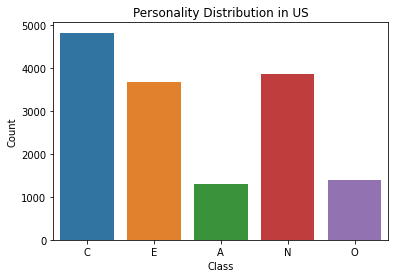

In [ ]:
df_US = df.loc[(df['country'] == 'US')]

sns.countplot(df_US['target'],order = target_classes)
plt.title('Personality Distribution in US')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Distribution
Plese find below an distribution analysis of the target variable.

##### Balance of Classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


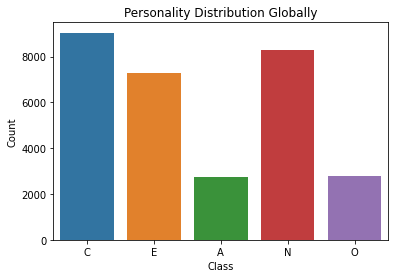

In [ ]:
sns.countplot(df['target'],order = target_classes)
plt.title('Personality Distribution Globally')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

`O` & `A` classes exhibit a significant imbalance, this can lead to biased predictions. This issue will be solved before training the models.

##### Distribution in Test Answers

###### Globally

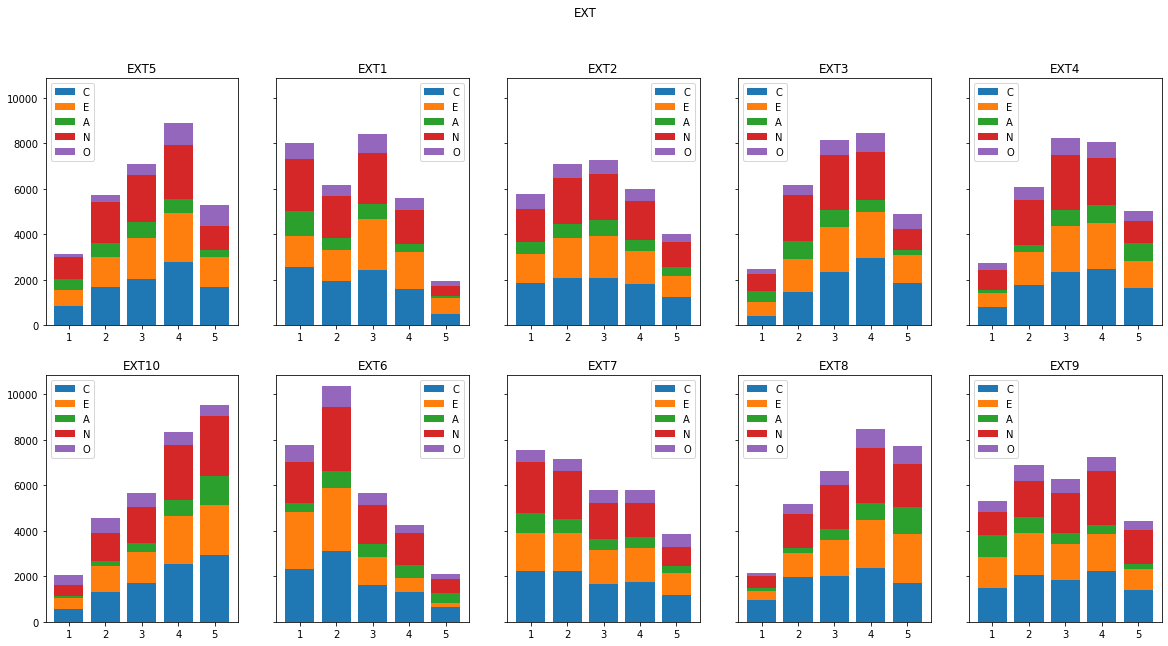

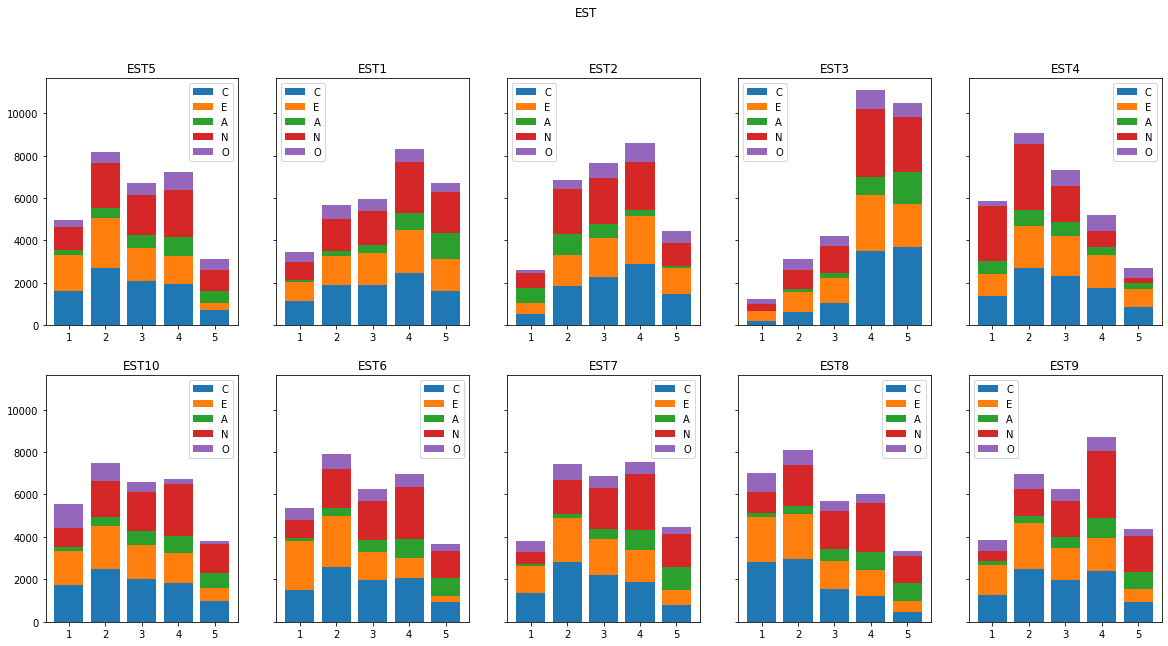

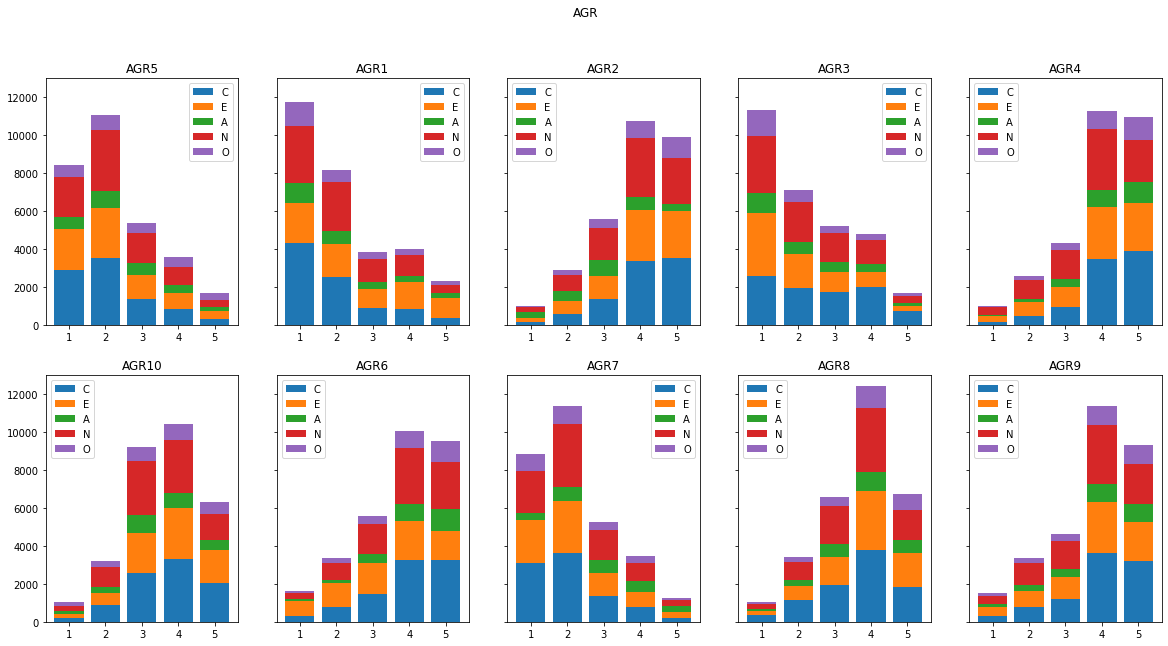

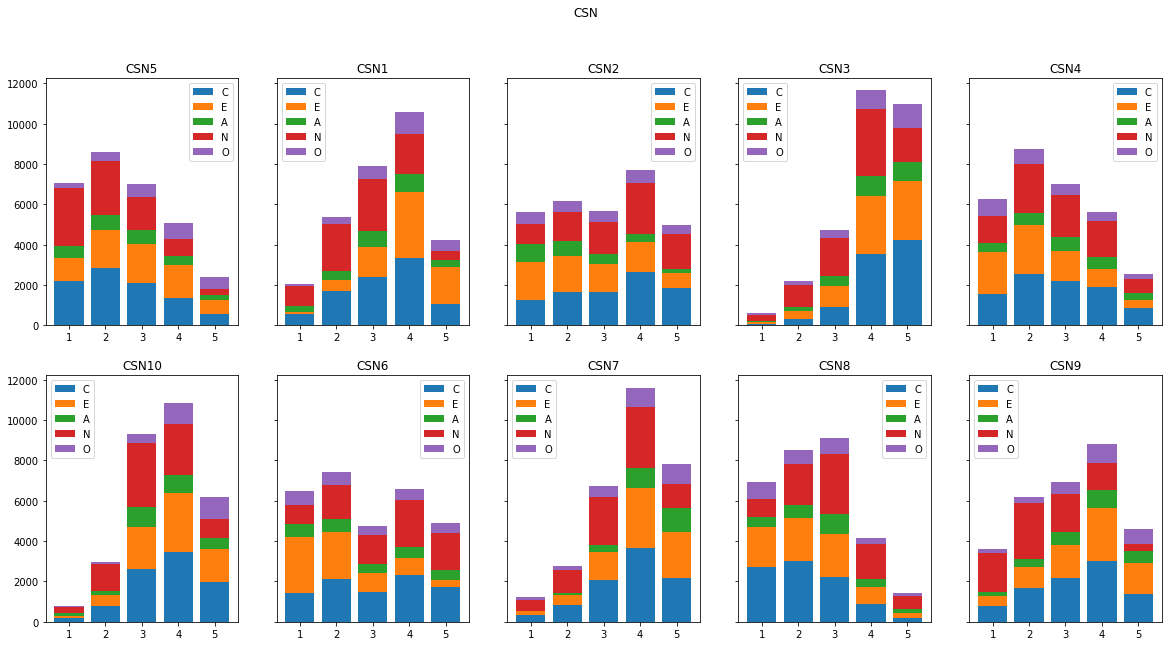

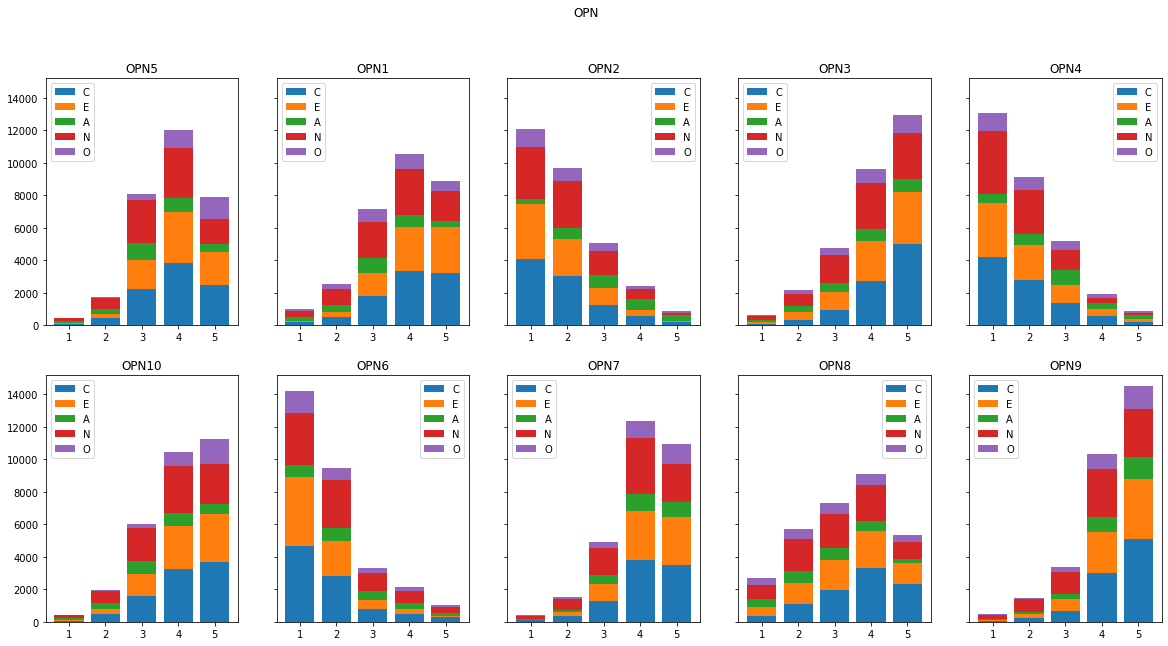

In [ ]:
q_types = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
targets = df['target'].unique()

for q in q_types:

    questions = [f"{q}{i}" for i in range(1, 11)]
    fig, axis = plt.subplots(ncols=5, nrows=2, figsize=(20, 10), sharey=True)
    fig.suptitle(q)
    for i, question in enumerate(questions):
        ax = axis[round((i+1)/10), (i + 1) % 5]
        ax.set_title(question)
        targets_data = [df[df['target'] == target][question].value_counts().sort_index() for target in targets]
        cumsum = np.cumsum(targets_data, axis=0)
        for i in range(len(targets_data)):
            if i == 0:
                ax.bar(targets_data[i].index, targets_data[i], label=targets[i])
            else:
                ax.bar(targets_data[i].index, targets_data[i], bottom=cumsum[i - 1], label=targets[i])

            ax.legend()

In [ ]:
# the above shows how each class answered a question. For example, OPN10, N(how emotional a person is) answered 5 roughly 2500 times

###### Per target

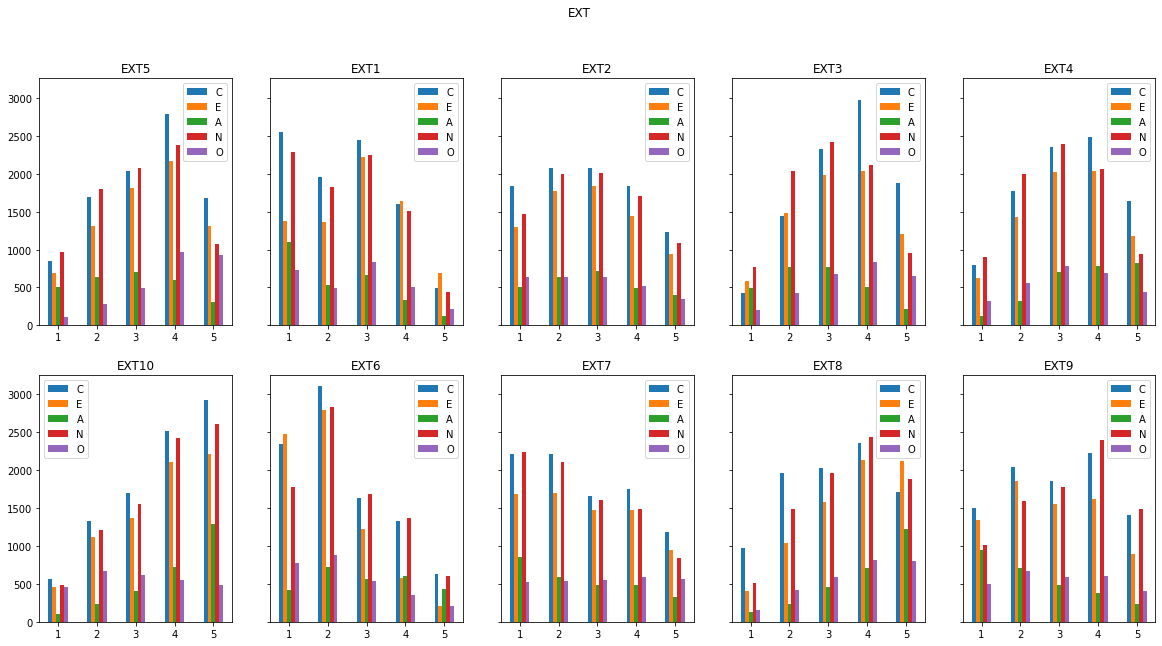

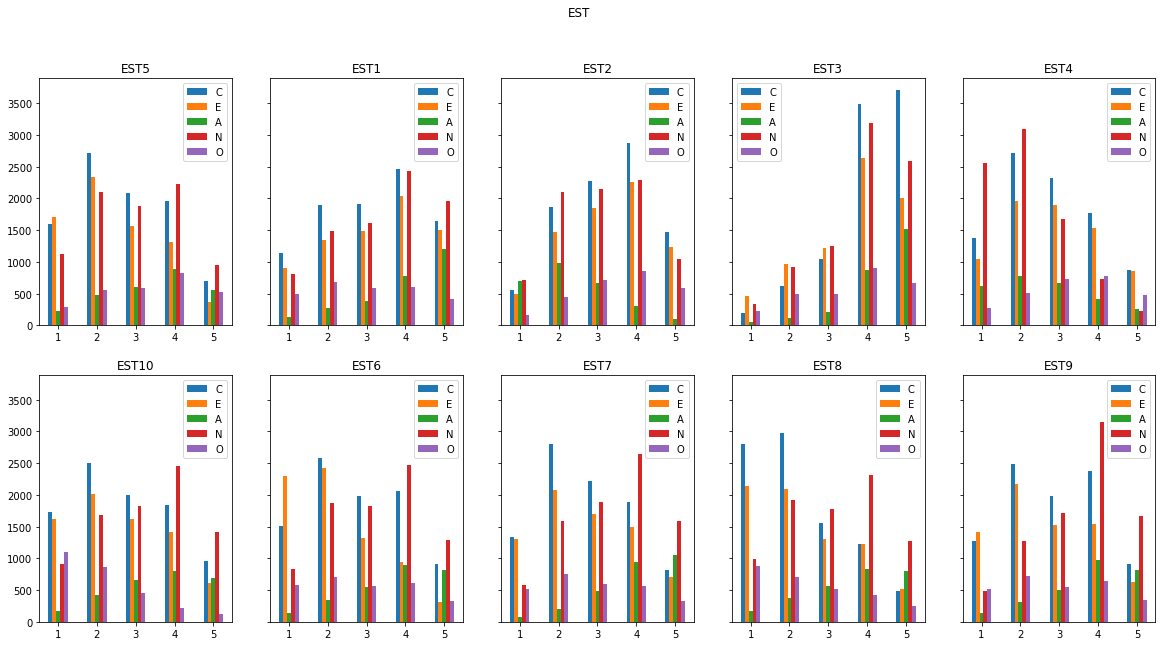

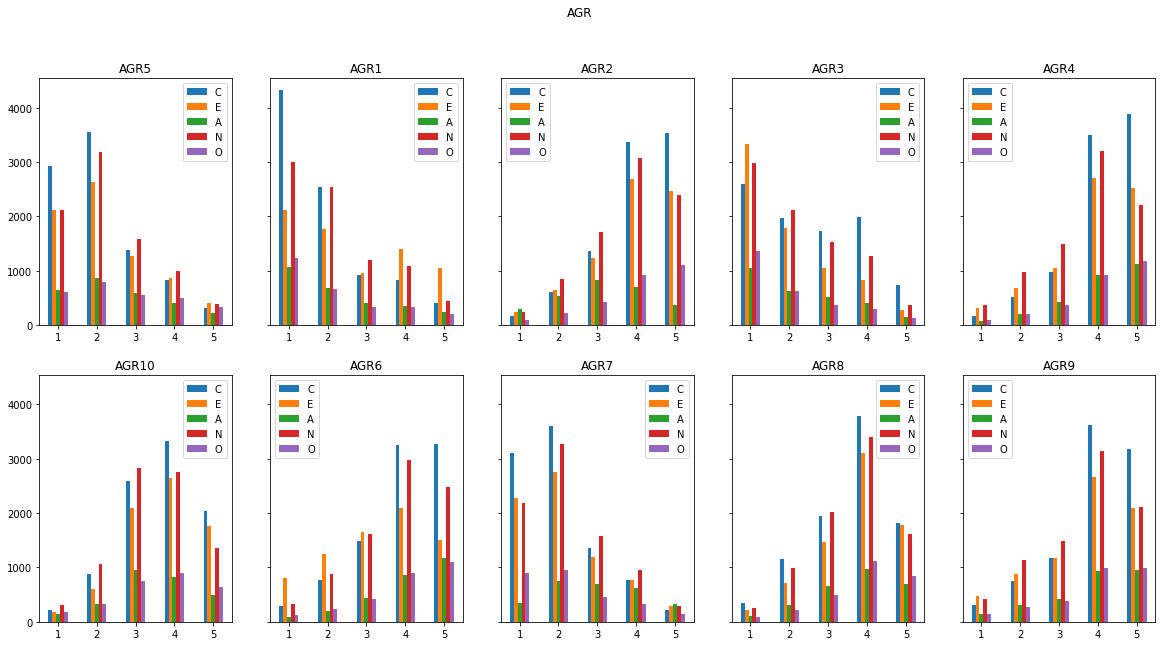

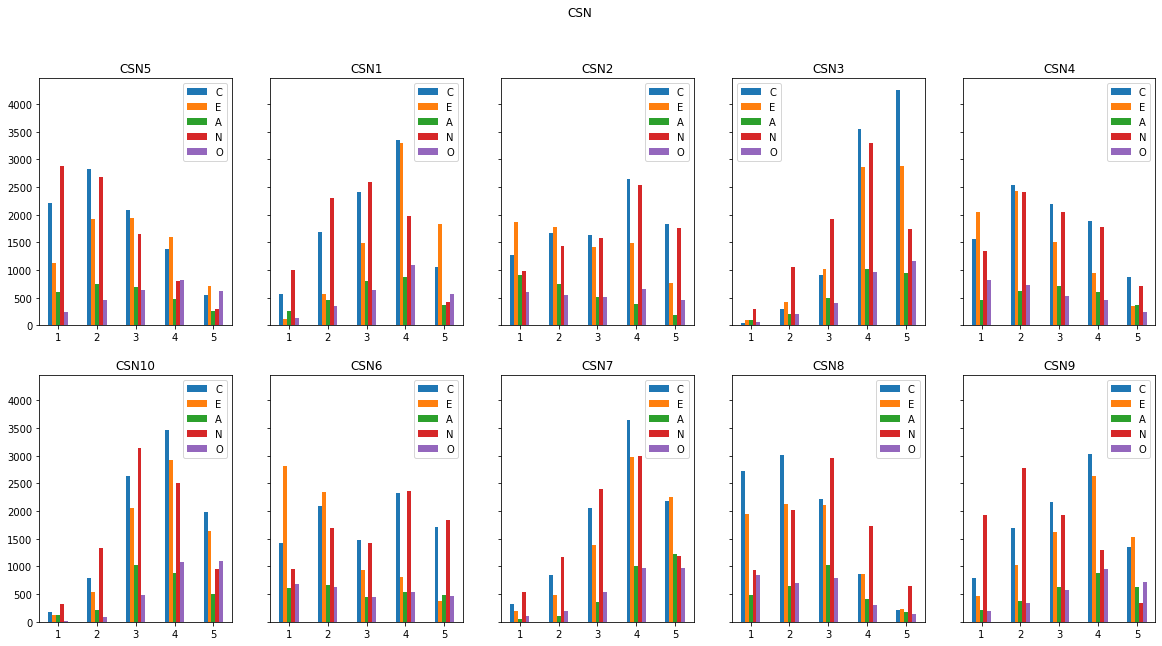

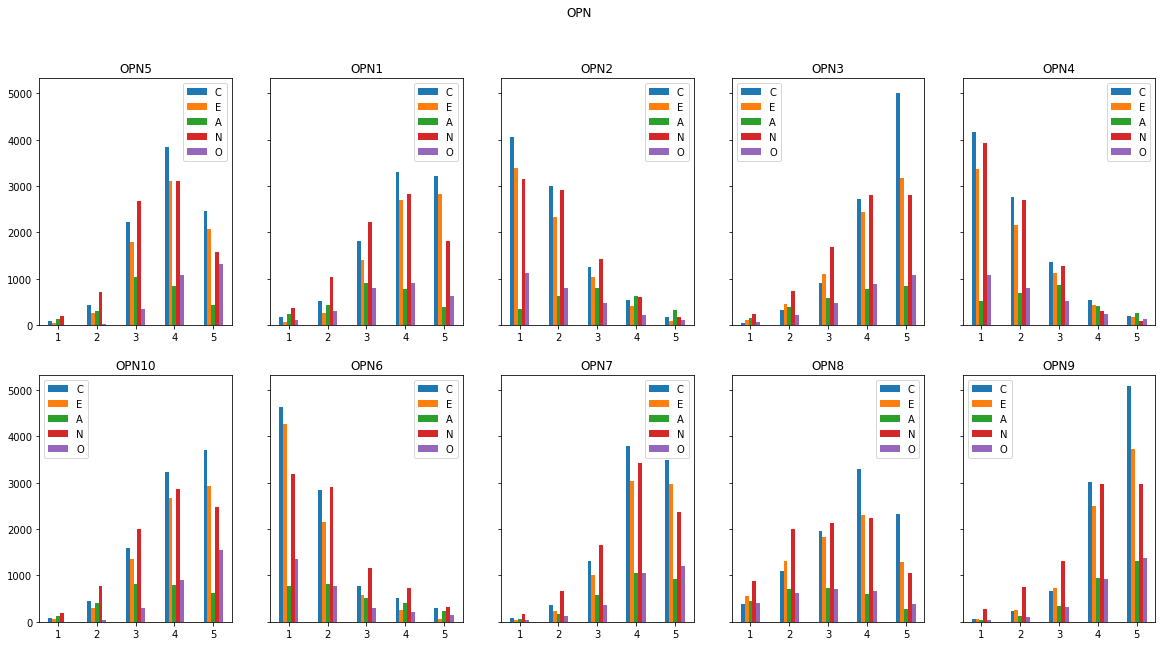

In [ ]:
width = 0.1
for q in q_types:

    questions = [f"{q}{i}" for i in range(1, 11)]
    fig, axis = plt.subplots(ncols=5, nrows=2, figsize=(20, 10), sharey=True)
    fig.suptitle(q)
    for j, question in enumerate(questions):
        ax = axis[round((j+1)/10), (j + 1) % 5]
        ax.set_title(question)
        targets_data = [df[df['target'] == target][question].value_counts().sort_index() for target in targets]
        for i in range(len(targets_data)):
            ax.bar(targets_data[i].index + (i - 2) * width, targets_data[i], width, label=targets[i])
            ax.set_xticks(targets_data[i].index)
            ax.legend()

In [ ]:
# save current df to google drive
from google.colab import files

path = '/gdrive/My Drive/Team 1 (Ethan,Ryan, Mounceff)/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

## Data Preparation

Columns containing ID, Date, computer specifications and geographic information do not add valuable information to solve the problem at hand. These will be deleted from the dataset as follows.

In [ ]:
def drop_other_cols(df):
    labels = ['id','dateload','screenw','screenh','IPC','testelapse','endelapse',
              'introelapse','country','lat_appx_lots_of_err','long_appx_lots_of_err']
    df.drop(labels = labels, inplace = True, axis = 1)
    return df

In [ ]:
df = drop_other_cols(df)

According to the descriptive analysis of the dataset the columns referencing the time spent answering questions contain a significant presence of outliers.  

The records in this columns was trimmed according to the following rule:
- The time values longer than 2 minutes will not be taken into account.

In [ ]:
def trim_time_cols(df):
    for col in time_columns:
        df = df[(df[col]>0) & (df[col]<=2)]
    return df

In [ ]:
# remove any columns with time answering questions longer than 2 minutes (and less than 0)
df = trim_time_cols(df)

Check the change on the distribution of the feature.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


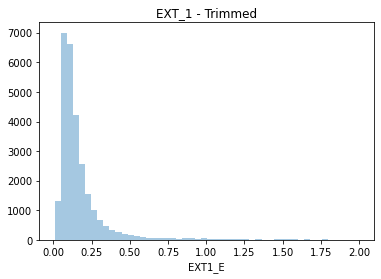

In [ ]:
sns.distplot(df['EXT1_E'],kde=False)
plt.title('EXT_1 - Trimmed')
plt.show()

In [ ]:
print(f'The filtered dataset has {df.shape[0]} records and {df.shape[1]} features.')

The filtered dataset has 27643 records and 102 features.


## Feature Selection

### Chi-Squared
<p>The dataset is conformed by 101 features, including target variable. A <i>&chi;<sup>2</sup></i> test was carried out in order to select the independent variables which are correlated to target variable.</p>

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=52)
fit = bestfeatures.fit(df.drop('target',axis=1),df['target'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.drop('target',axis=1).columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores.sort_values(by='Score',ascending=False).head(52)

,Feature,Score
0,ID,"6,895.66"
18,EST8,"2,002.51"
36,CSN6,"1,913.99"
16,EST6,"1,814.13"
39,CSN9,"1,808.31"
35,CSN5,"1,452.82"
20,EST10,"1,420.19"
17,EST7,"1,413.30"
42,OPN2,"1,391.22"
14,EST4,"1,264.80"


Following to the results above, the time columns will be dropped, as well as, the last two columns which lowest score following Chi-Squared results. Keeping 50 features in total.

In [ ]:
def select_features(df,time_columns):
    df.drop(labels = time_columns, axis=1,inplace = True)
    return df

In [ ]:
df = select_features(df,time_columns)
col = df.drop('target',axis=1).columns.values
print(f'Models will be trained with the following features\n{col}')

Models will be trained with the following features
['ID' 'EXT1' 'EXT2' 'EXT3' 'EXT4' 'EXT5' 'EXT6' 'EXT7' 'EXT8' 'EXT9'
 'EXT10' 'EST1' 'EST2' 'EST3' 'EST4' 'EST5' 'EST6' 'EST7' 'EST8' 'EST9'
 'EST10' 'AGR1' 'AGR2' 'AGR3' 'AGR4' 'AGR5' 'AGR6' 'AGR7' 'AGR8' 'AGR9'
 'AGR10' 'CSN1' 'CSN2' 'CSN3' 'CSN4' 'CSN5' 'CSN6' 'CSN7' 'CSN8' 'CSN9'
 'CSN10' 'OPN1' 'OPN2' 'OPN3' 'OPN4' 'OPN5' 'OPN6' 'OPN7' 'OPN8' 'OPN9'
 'OPN10']


### Correlation Matrix
The following matrix gives an insight of the strengt of linear association between independent variables.

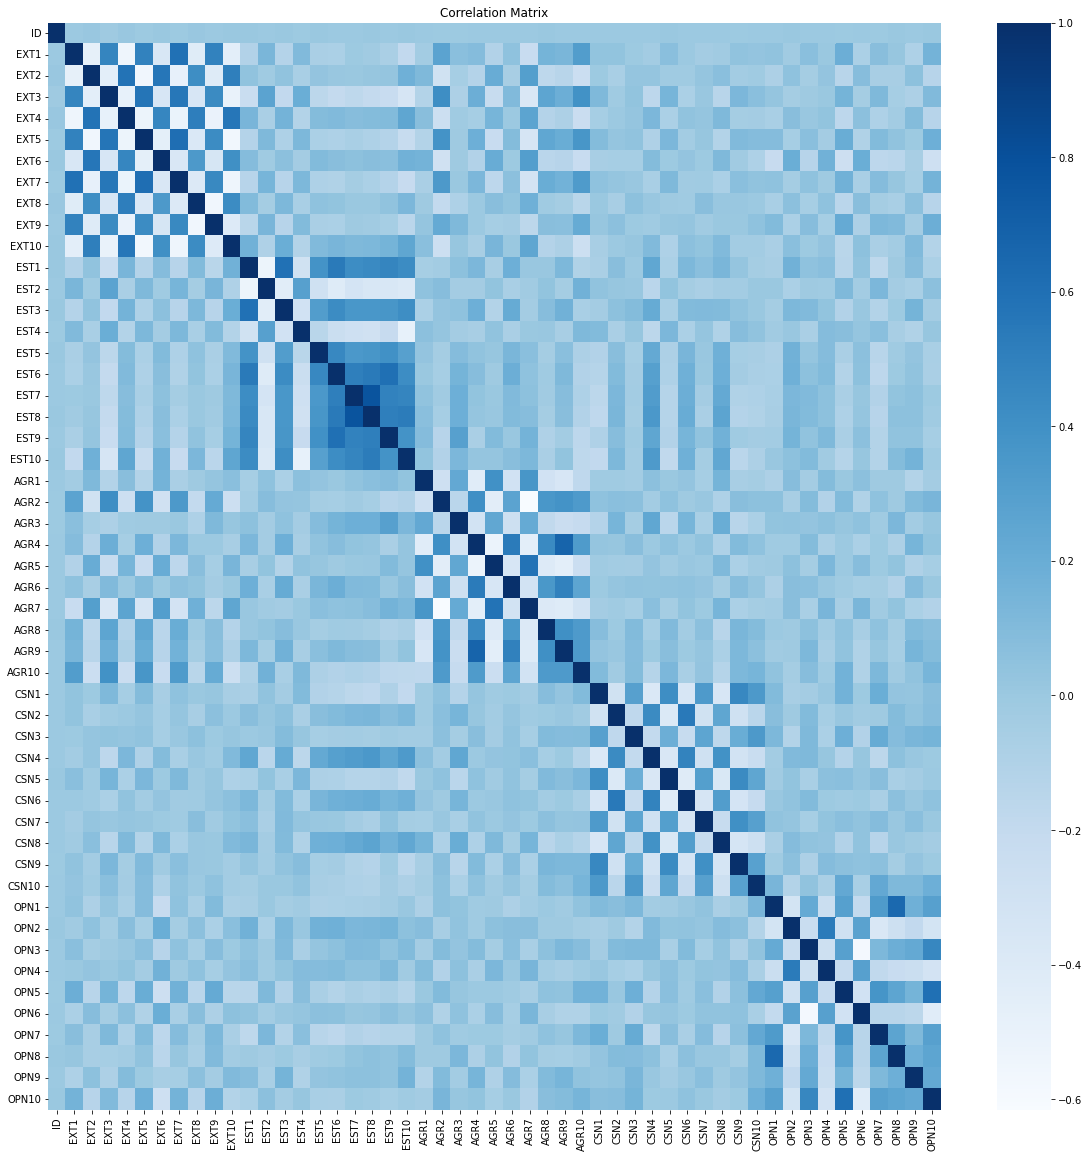

In [ ]:
corr = df.drop('target',axis=1).corr(method='pearson')
fig,ax = plt.subplots(1,1,figsize=(20,20))
sns.heatmap(corr,cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

Some clusters along common topic of anwers can be found in the correlation matrix, but there is no significant correlation between variables which can lead to an issue of multicolinearity.
# Modelling
The problem at hand requires an algorithm that maps the input data to the specific category, as well as, it will predict the class for the new data. Different classifiers can be found, 

- **Binary Classification:** Classification task with two possible outcomes, e.g., Gender classification (Male/Female)
- **Multi-class classification:** Classification with more than two classes. In multi-class classification, each sample is assigned to one and only one target label, e.g., an animal can be a cat or dog but not both at the same time.
- **Multi-label classification:** Classification task where each sample is mapped to a set of target labels (more than one class), e.g., a news article can be about sports, a person, and location at the same time.

The problem at hand might be tackled with a `Multi-Class Classifier`.

Due to the fact that the distinct classes in target variable are imbalanced, two approaches to solve this issue will be followed:
- Undersampling the data
- Oversampling the data

## Undersampled Dataset
Start by randomly dropping records in the dataset in order to balance the proportion of distinct classes in target variable. Then the *undersampled dataset* will be split into training and testing set.

In [ ]:
sm = RandomUnderSampler(random_state=0,sampling_strategy='all')
X_res, y_res = sm.fit_resample(df.drop('target',axis=1), df['target'])
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, 
                                                    random_state=0, shuffle=True, stratify = y_res)

The balance of the distinct classes in the target variable was checked as follows.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


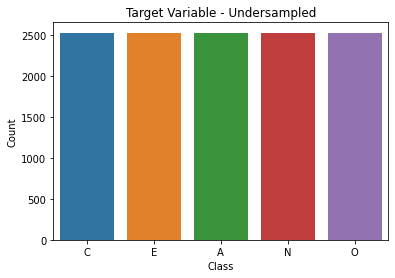

In [ ]:
sns.countplot(y_res,order = target_classes)
plt.title('Target Variable - Undersampled')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Creates a dictionary to store the trained models with *undersampled dataset*.

In [ ]:
models_us = {}

In [ ]:
X_train

,ID,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
12070,16733,2.00,3.00,4.00,4.00,3.00,3.00,4.00,4.00,2.00,3.00,1.00,5.00,1.00,5.00,2.00,1.00,1.00,1.00,2.00,1.00,4.00,4.00,2.00,3.00,4.00,4.00,3.00,2.00,4.00,4.00,2.00,4.00,4.00,2.00,1.00,4.00,4.00,5.00,2.00,4.00,4.00,2.00,4.00,1.00,4.00,2.00,4.00,4.00,5.00,4.00
7779,21816,5.00,1.00,4.00,1.00,4.00,1.00,4.00,1.00,5.00,2.00,5.00,1.00,5.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,5.00,3.00,5.00,1.00,5.00,1.00,5.00,5.00,5.00,4.00,2.00,5.00,4.00,1.00,2.00,5.00,3.00,4.00,5.00,5.00,1.00,5.00,1.00,4.00,1.00,4.00,4.00,5.00,5.00
2255,3253,1.00,5.00,2.00,5.00,1.00,5.00,1.00,4.00,1.00,5.00,5.00,2.00,5.00,2.00,4.00,4.00,3.00,2.00,4.00,4.00,4.00,2.00,2.00,2.00,4.00,4.00,4.00,3.00,2.00,1.00,4.00,2.00,3.00,2.00,2.00,2.00,5.00,3.00,4.00,4.00,3.00,2.00,2.00,1.00,3.00,3.00,5.00,3.00,4.00,3.00
4486,2612,3.00,3.00,5.00,4.00,5.00,2.00,3.00,4.00,4.00,4.00,4.00,3.00,4.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,1.00,4.00,3.00,5.00,2.00,4.00,2.00,4.00,5.00,4.00,4.00,4.00,4.00,2.00,2.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,1.00,4.00,1.00,4.00,4.00,5.00,5.00
4445,44778,1.00,4.00,2.00,4.00,2.00,3.00,2.00,4.00,2.00,5.00,4.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,2.00,3.00,1.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,3.00,1.00,4.00,3.00,4.00,2.00,4.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,2.00,3.00,2.00,4.00,4.00,4.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,40293,1.00,4.00,2.00,5.00,2.00,3.00,1.00,5.00,1.00,5.00,5.00,3.00,5.00,1.00,1.00,3.00,4.00,3.00,3.00,5.00,2.00,5.00,4.00,4.00,3.00,3.00,2.00,3.00,3.00,3.00,2.00,2.00,3.00,4.00,2.00,2.00,3.00,3.00,2.00,3.00,4.00,3.00,5.00,1.00,3.00,1.00,3.00,4.00,5.00,4.00
7126,2107,1.00,4.00,3.00,5.00,2.00,4.00,3.00,5.00,2.00,5.00,4.00,4.00,4.00,2.00,1.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,4.00,3.00,3.00,1.00,3.00,4.00,3.00,3.00,1.00,4.00,1.00,2.00,1.00,4.00,4.00,2.00,2.00,3.00,4.00,2.00,5.00,3.00,5.00,1.00,5.00,2.00,4.00,4.00
11990,16238,1.00,3.00,4.00,3.00,3.00,2.00,1.00,4.00,1.00,3.00,5.00,2.00,4.00,3.00,3.00,5.00,3.00,2.00,5.00,1.00,2.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00,2.00,1.00,4.00,3.00,2.00,3.00,2.00,5.00,3.00,3.00,3.00,2.00,2.00,5.00,1.00,5.00,2.00,4.00,2.00,5.00,5.00
2137,50681,3.00,3.00,2.00,3.00,1.00,5.00,1.00,3.00,5.00,5.00,5.00,1.00,5.00,5.00,4.00,4.00,5.00,5.00,5.00,5.00,3.00,3.00,2.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,1.00,1.00,2.00,4.00,5.00,3.00,5.00,5.00,3.00,2.00,3.00,4.00,1.00,2.00,3.00,5.00,2.00,1.00,2.00,3.00


In [ ]:
y_train

12070    O
7779     N
2255     A
4486     C
4445     C
        ..
4070     C
7126     E
11990    O
2137     A
5526     E
Name: target, Length: 10108, dtype: object

### Logistic Regression

In [ ]:
# this is NOT a classic regression model. It is more of a binary classification algorithm. 
# Set to use Multinominal: Uses a simple extension of binary logistic regression that allows for more than two categories of the dependent or outcome variable
%%time
logistic = LogisticRegression(solver = 'lbfgs', n_jobs=-1, max_iter=350, random_state=0, multi_class='multinomial')
logistic.fit(X_train, y_train)
models_us[str(type(logistic).__name__)] = logistic

CPU times: user 58.9 ms, sys: 25.3 ms, total: 84.2 ms
Wall time: 4.31 s


### Decision Tree Classifier

In [ ]:
%%time
tree = DecisionTreeClassifier(random_state = 0, max_depth = 30, criterion = "gini", max_features = 50,
                              min_samples_leaf = 45, min_samples_split = 45, ccp_alpha = 0.000001)
tree.fit(X_train,y_train)
models_us[str(type(tree).__name__)] = tree

CPU times: user 110 ms, sys: 1.6 ms, total: 111 ms
Wall time: 128 ms


### Random Forest

In [ ]:
%%time
randomf = RandomForestClassifier(random_state = 0, bootstrap = True,   criterion = "gini", min_samples_leaf = 45, 
                                 max_features = 50, max_depth = 30,min_samples_split = 45, n_estimators = 40,
                                 n_jobs = -1)
randomf.fit(X_train,y_train)
models_us[str(type(randomf).__name__)] = randomf

CPU times: user 2.97 s, sys: 805 µs, total: 2.97 s
Wall time: 1.64 s


### Bayes Classifier

In [ ]:
%%time
bayes = CategoricalNB()
bayes.fit(X_train, y_train)
models_us[str(type(bayes).__name__)] = bayes

CPU times: user 68.9 ms, sys: 895 µs, total: 69.8 ms
Wall time: 72.2 ms


Another Classifier!

In [ ]:
%%time
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_train,y_train)

#models_us[str(type(knn).__name__)] = knn

CPU times: user 4.88 ms, sys: 1.02 ms, total: 5.89 ms
Wall time: 7.76 ms


## Error Analysis
### Confusion Matrix
Function which plots the `Confusion Matrix` for multiple models.

In [ ]:
def plot_conf_mat(models,X,y,label):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.suptitle(f'Confusion Matrix - {label}',fontsize=16)

    for model, ax in zip(models, axes.flatten()):
        estimator = models[str(model)]

        plot_confusion_matrix(estimator, 
                              X, 
                              y, 
                              ax=ax, 
                              cmap='Blues',
                              normalize= 'all',
                              values_format = '.2f',
                              display_labels=list(estimator.classes_))
        ax.title.set_text(type(estimator).__name__)
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
    plt.show()

Function which prints the `Classification Report` for each model.

In [ ]:
def classif_report(models,X_test,y_test):
    for model in models:

        estimator = models[str(model)]
        y_pred = models[str(model)].predict(X_test)
        report = classification_report(y_test,y_pred,
                                       output_dict=True,
                                       target_names=list(estimator.classes_))
        clsf_report = pd.DataFrame(report).transpose()
        print(model+ '\n' + str(clsf_report) + '\n')

Function which print the `Accuracy` of the models.

In [ ]:
def accuracy_score_models(models,X_test):
    for model in models:
        estimator = models[str(model)]
        y_pred = estimator.predict(X_test)
        print(type(estimator).__name__, round(accuracy_score(y_test, y_pred),3))

Function which plots `Precision-Recall` & `Receiver Operating Characteristic Curve` for the multiclass case.

In [ ]:
def pr_roc_curves_multiclass(estimator,X,y,label = None):
    # Binarize the output
    y = label_binarize(y, classes=list(estimator.classes_))
    n_classes = y.shape[1]

    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=0,
                                                        shuffle=True,stratify = y)

    # Learn to predict each class against the other
    y_score = estimator.decision_function(X_test)
        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    #Compute Precision-Recall for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
    
    # Compute micro-average ROC curve and ROC area and aggregate all false positive rates
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        
    # Average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_score,average="micro")


    
    # Setup plot details
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','darkviolet','gold','blue'])
    lw = 2

    # Plot Precision - Recall curves
    # Plot iso-F1 curves
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = ax[0].plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        ax[0].annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = ax[0].plot(recall["micro"], precision["micro"], linestyle=':', color='deeppink', lw=4)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'''.format(average_precision["micro"]))
    
    # Plot ROC Curves
    ax[1].plot(fpr["micro"], tpr["micro"],
             color='deeppink', linestyle=':', linewidth=4,
             label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]))

    ax[1].plot(fpr["macro"], tpr["macro"],
             color='navy', linestyle=':', linewidth=4,
             label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]))

    
    for i, color in zip(range(n_classes), colors):
        class_ref = list(estimator.classes_)[i]
        # Plot Precision - Recall curves for each class
        l, = ax[0].plot(recall[i], precision[i], color=color, lw=lw)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'''.format(class_ref, average_precision[i]))
        
        # Same for ROC curves
        ax[1].plot(fpr[i], tpr[i], color=color, lw=lw,
                   label='ROC curve of class {0} (area = {1:0.2f})'''.format(class_ref,roc_auc[i]))

    
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.01])
    ax[0].set_xlabel('Recall',fontsize=12)
    ax[0].set_ylabel('Precision',fontsize=12)
    ax[0].set_title(f'Precision-Recall Curve - {type(estimator).__name__} {label}',fontsize=12)
    ax[0].legend(lines, labels, loc=(0, -.45), prop=dict(size=12),frameon = False,fontsize=12)
    
    ax[1].plot([0, 1], [0, 1], 'k--', lw=lw)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.01])
    ax[1].set_xlabel('False Positive Rate',fontsize=12)
    ax[1].set_ylabel('True Positive Rate',fontsize=12)
    ax[1].set_title(f'ROC Curve - {type(estimator).__name__} {label}',fontsize=12)
    ax[1].legend(loc=(0, -.45), prop=dict(size=12),frameon=False,fontsize=12)

    plt.show()

### Confusion Matrix
#### Training Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

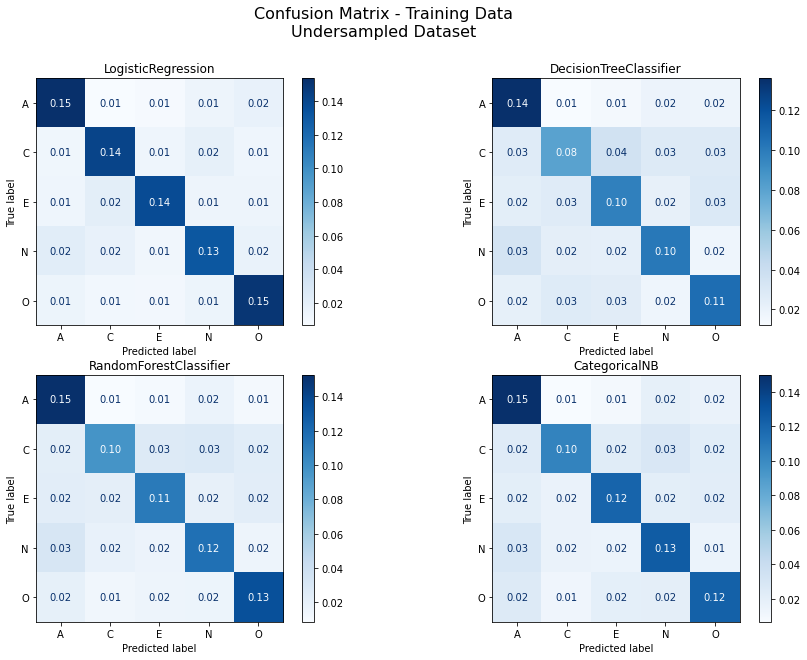

In [ ]:
plot_conf_mat(models_us,X_train,y_train,label='Training Data\nUndersampled Dataset')

#### Validation Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

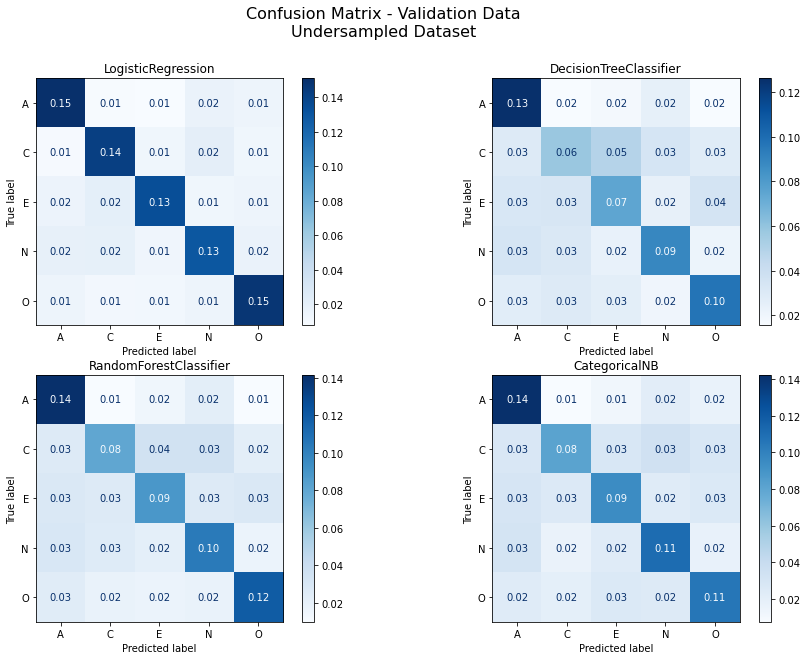

In [ ]:
plot_conf_mat(models_us,X_test,y_test,label='Validation Data\nUndersampled Dataset')

### Classification Report

In [ ]:
classif_report(models_us,X_test,y_test)

LogisticRegression
              precision  recall  f1-score  support
A                  0.72    0.76      0.74   505.00
C                  0.70    0.71      0.71   505.00
E                  0.74    0.67      0.71   505.00
N                  0.66    0.65      0.65   506.00
O                  0.71    0.74      0.72   506.00
accuracy           0.71    0.71      0.71     0.71
macro avg          0.71    0.71      0.71 2,527.00
weighted avg       0.71    0.71      0.71 2,527.00

DecisionTreeClassifier
              precision  recall  f1-score  support
A                  0.50    0.63      0.56   505.00
C                  0.35    0.29      0.32   505.00
E                  0.39    0.37      0.38   505.00
N                  0.46    0.44      0.45   506.00
O                  0.49    0.48      0.49   506.00
accuracy           0.45    0.45      0.45     0.45
macro avg          0.44    0.45      0.44 2,527.00
weighted avg       0.44    0.45      0.44 2,527.00

RandomForestClassifier
              p

### Accuracy Score

In [ ]:
accuracy_score_models(models_us,X_test)

LogisticRegression 0.706
DecisionTreeClassifier 0.445
RandomForestClassifier 0.533
CategoricalNB 0.536


### Precision-Recall & ROC Curve - Best Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


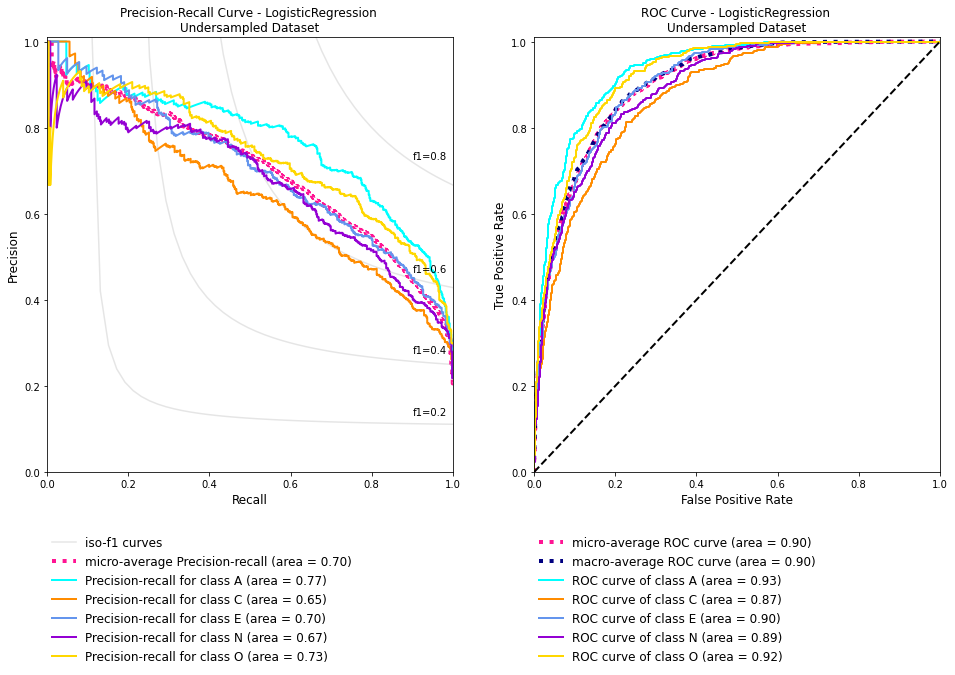

In [ ]:
pr_roc_curves_multiclass(models_us['LogisticRegression'], X_res, y_res, label = '\nUndersampled Dataset')

The `Precision-Recall Curve` & `ROC Curve` show that the classifer has a room of improvement related to **C**,**E**,**N** classes mainly. 
## Oversampled Dataset
Start by randomly copying records in the dataset in order to balance the proportion of distinct classes in target variable. Then the *oversampled dataset* will be split into training and testing set.

In [ ]:
sm = RandomOverSampler(random_state=0,sampling_strategy='all')
X_res, y_res = sm.fit_resample(df.drop('target',axis=1), df['target'])
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, 
                                                    random_state=0,shuffle=True, 
                                                    stratify = y_res)

The balance of the distinct classes in the target variable was checked as follows.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


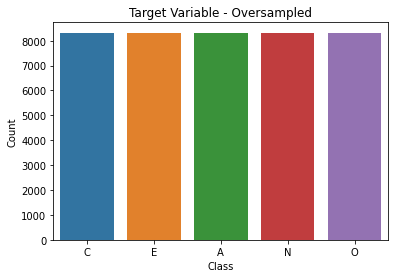

In [ ]:
sns.countplot(y_res,order=target_classes)
plt.title('Target Variable - Oversampled')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Create a dictionary to store the trained models with *oversampled dataset*.

In [ ]:
models_os = {}

### Logistic Regression

In [ ]:
%%time
logistic.fit(X_train, y_train)
models_os[str(type(logistic).__name__)] = logistic

CPU times: user 129 ms, sys: 43.9 ms, total: 173 ms
Wall time: 10.8 s


### Decision Tree Classifier

In [ ]:
%%time
tree.fit(X_train,y_train)
models_os[str(type(tree).__name__)] = tree

CPU times: user 404 ms, sys: 753 µs, total: 405 ms
Wall time: 409 ms


### Random Forest

In [ ]:
%%time
randomf.fit(X_train,y_train)
models_os[str(type(randomf).__name__)] = randomf

CPU times: user 12.4 s, sys: 25.4 ms, total: 12.4 s
Wall time: 6.48 s


### Bayes Classifier

In [ ]:
%%time
bayes.fit(X_train, y_train)
models_os[str(type(bayes).__name__)] = bayes

CPU times: user 189 ms, sys: 5.95 ms, total: 195 ms
Wall time: 197 ms


## Error Analysis
### Confusion Matrix
#### Training Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

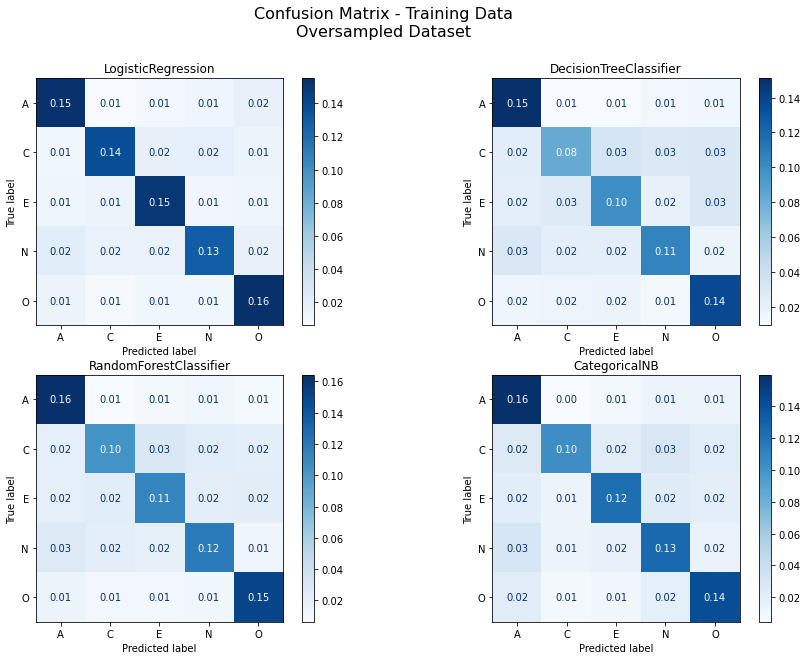

In [ ]:
plot_conf_mat(models_os,X_train,y_train,label='Training Data\nOversampled Dataset')

#### Validation Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

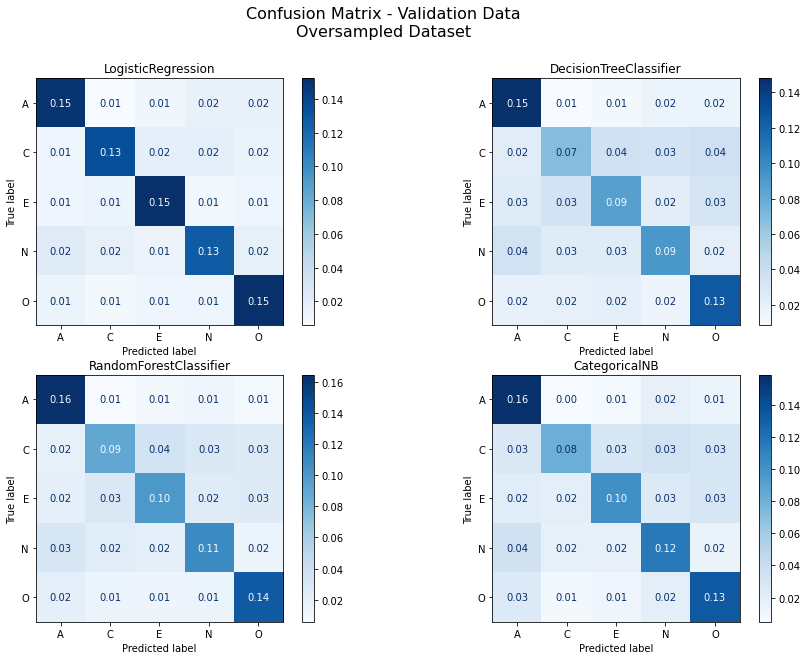

In [ ]:
plot_conf_mat(models_os,X_test,y_test,label='Validation Data\nOversampled Dataset')

### Classification Report

In [ ]:
classif_report(models_os,X_test,y_test)

LogisticRegression
              precision  recall  f1-score  support
A                  0.71    0.75      0.73 1,664.00
C                  0.75    0.67      0.71 1,664.00
E                  0.73    0.76      0.75 1,664.00
N                  0.69    0.64      0.66 1,664.00
O                  0.71    0.76      0.73 1,664.00
accuracy           0.72    0.72      0.72     0.72
macro avg          0.72    0.72      0.72 8,320.00
weighted avg       0.72    0.72      0.72 8,320.00

DecisionTreeClassifier
              precision  recall  f1-score  support
A                  0.59    0.74      0.66 1,664.00
C                  0.44    0.34      0.39 1,664.00
E                  0.48    0.43      0.46 1,664.00
N                  0.51    0.46      0.48 1,664.00
O                  0.54    0.63      0.58 1,664.00
accuracy           0.52    0.52      0.52     0.52
macro avg          0.51    0.52      0.51 8,320.00
weighted avg       0.51    0.52      0.51 8,320.00

RandomForestClassifier
              p

### Accuracy Score

In [ ]:
accuracy_score_models(models_os,X_test)

LogisticRegression 0.716
DecisionTreeClassifier 0.522
RandomForestClassifier 0.602
CategoricalNB 0.591


### Precision-Recall & ROC Curve  - Best Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


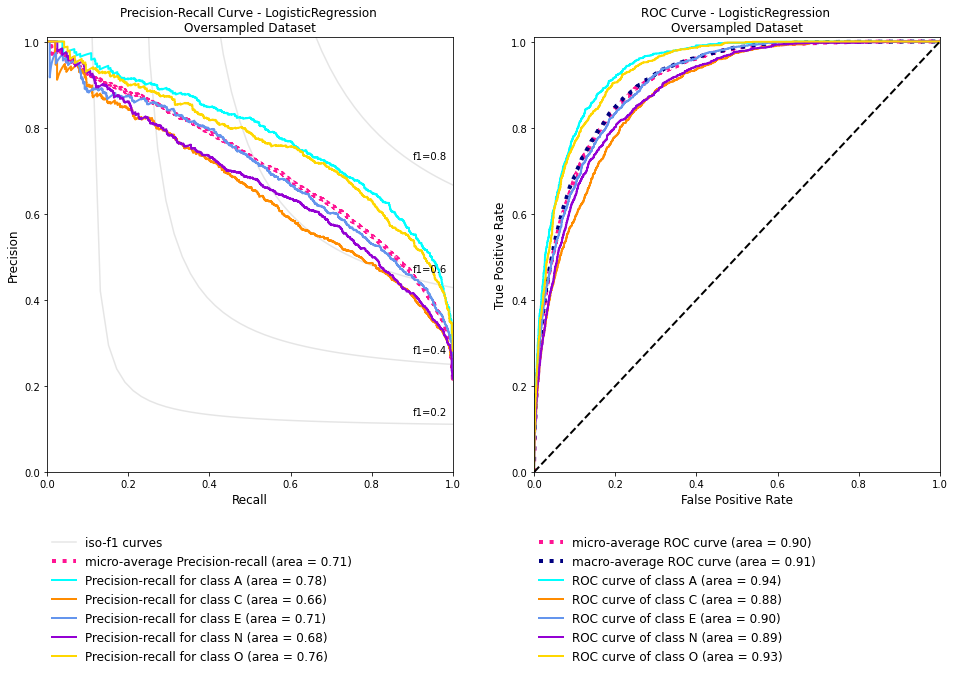

In [ ]:
pr_roc_curves_multiclass(models_os['LogisticRegression'],X_res,y_res, label = '\nOversampled Dataset')

# Deployment
This phase starts with the selection of the best model from the set of candidate models. This one corresponds to the most well-suited to carry out future classifications, as well as, is the one that exhibited the best metrics defined during the data mining process.
## Model Selection
After training the models in two scenarios (*undersampled dataset* & *oversampled dataset*) the following conclusions can be told about the cadidate models:

- `Logistic Regressor` showed the best performance from the set of candidate models and regardless the amount of data.
- `Decision Tree Classifier` & `Random Forest Classifier` showed a better performance when trained with more data.
- `Categorical Naive Bayes` showed no change in its performance regardless the amount of data.

Thus the `Logistic Regressor` trained with the *undersampled dataset* was selected as the best candidate. This model will predict the new data and is simpler than the one trained with the oversampled dataset.

In [ ]:
model = models_us['LogisticRegression']

## Serialization
The model will be serialized in order to store it in a file which can be stored for its future transmission or reconstruction. The output of this process is a byte stream file.

In [ ]:
#joblib.dump(model, 'big_five.pkl')

# Pipeline
The data mining process carried out along this notebook can be summarized according to the following pipeline.

<center><img src="assets/Pipeline.png" alt="Pipeline" style="width: 900px;"/></center>
<center><i>Figure 3. Pipeline.<br></i></center>

New data ingested by the system will follow the pipeline highlighted green but the *Fix Imbalance* step.

# Test Dataset
## Data Ingestion

In [ ]:
df_test = pd.read_csv('/gdrive/My Drive/Team 1 (Ethan,Ryan, Mounceff)/BigFivePersonalityTest-TrainSetWithoutTarget.csv',index_col = 0)
df_test.rename(columns = {'ID':'id'},inplace = True)
df_test.shape

(50768, 111)

## Data Pipeline 

In [ ]:
df_test = filter_IPC(df_test)
df_test = drop_dupl(df_test)
df_test = missing_answers(df_test,answer_columns)
df_test = drop_missing(df_test)
df_test = narrow_time_cols(df_test)

ids = df_test['id'].reset_index(drop = True)
df_test = drop_other_cols(df_test)
df_test = select_features(df_test,time_columns)
df_test.shape

(30131, 50)

## Prediction

In [ ]:
#df_test = df_test.join(df_target.set_index('id'), on='ID')
#df_test = df_test.rename(columns={"Class": "target"})

In [ ]:
df_test

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
3,4.00,2.00,4.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,5.00,1.00,5.00,1.00,5.00,2.00,4.00,5.00,4.00,4.00,3.00,5.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,4.00,4.00
5,2.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,4.00,2.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,5.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,5.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,4.00,5.00,5.00,5.00
8,3.00,5.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,5.00,4.00,5.00,5.00,2.00,3.00,1.00,5.00,5.00,2.00,3.00,4.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,3.00,4.00,3.00,5.00,2.00,3.00,1.00,5.00,3.00,2.00,5.00,4.00,1.00,5.00,1.00,5.00,1.00,5.00,4.00,4.00,5.00
9,2.00,4.00,3.00,4.00,4.00,1.00,2.00,3.00,3.00,4.00,1.00,5.00,3.00,4.00,2.00,3.00,2.00,2.00,4.00,2.00,2.00,5.00,2.00,4.00,2.00,4.00,2.00,3.00,4.00,3.00,4.00,1.00,5.00,1.00,5.00,2.00,5.00,1.00,4.00,5.00,4.00,5.00,4.00,5.00,4.00,2.00,4.00,3.00,3.00,4.00
11,4.00,2.00,1.00,5.00,1.00,2.00,3.00,5.00,1.00,5.00,5.00,1.00,5.00,3.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,5.00,3.00,5.00,3.00,5.00,1.00,5.00,5.00,5.00,2.00,3.00,2.00,1.00,2.00,2.00,5.00,3.00,5.00,5.00,2.00,5.00,2.00,4.00,5.00,1.00,5.00,1.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50754,2.00,1.00,5.00,2.00,5.00,2.00,4.00,2.00,4.00,1.00,2.00,5.00,4.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,5.00,2.00,5.00,2.00,5.00,2.00,5.00,5.00,5.00,4.00,5.00,4.00,1.00,2.00,2.00,2.00,1.00,3.00,2.00,5.00,2.00,4.00,2.00,4.00,2.00,5.00,2.00,5.00,5.00
50759,1.00,3.00,2.00,5.00,2.00,2.00,1.00,5.00,1.00,5.00,4.00,2.00,5.00,2.00,4.00,3.00,4.00,4.00,4.00,4.00,2.00,5.00,3.00,5.00,2.00,4.00,2.00,4.00,4.00,3.00,2.00,3.00,5.00,4.00,3.00,2.00,4.00,3.00,2.00,3.00,3.00,3.00,2.00,1.00,2.00,2.00,2.00,3.00,5.00,4.00
50760,2.00,3.00,2.00,4.00,3.00,2.00,2.00,4.00,2.00,5.00,4.00,4.00,5.00,2.00,4.00,4.00,4.00,2.00,2.00,4.00,2.00,4.00,2.00,5.00,2.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,3.00,3.00,3.00,4.00,1.00,3.00,3.00,5.00,2.00,5.00,2.00,4.00,1.00,4.00,3.00,5.00,4.00
50761,2.00,4.00,1.00,4.00,2.00,2.00,1.00,1.00,4.00,4.00,5.00,1.00,5.00,1.00,4.00,4.00,5.00,5.00,4.00,5.00,4.00,5.00,5.00,1.00,5.00,5.00,2.00,4.00,5.00,3.00,1.00,5.00,2.00,5.00,1.00,5.00,3.00,5.00,1.00,4.00,5.00,2.00,5.00,2.00,5.00,1.00,5.00,5.00,5.00,5.00


In [ ]:
results = pd.DataFrame(model.predict(df_test),columns={'Class'})
results = pd.concat([ids,results],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- ID

  warnings.warn(message, FutureWarning)


ValueError: ignored

### Grapical Overview

In [ ]:
sns.countplot(results['Class'],order = target_classes)
plt.title('Test Data')
plt.show()

NameError: ignored

### Export Predicted Data

In [ ]:
results.to_csv('data/Resultado.csv', index = False)

NameError: ignored

# References
    [1]	M. F. Hornick, E. Marcadé, and S. Venkayala, “Chapter 3 - Data Mining Process,” in The Morgan Kaufmann Series in Data Management Systems, M. F. Hornick, E. Marcadé, and S. B. T.-J. D. M. Venkayala, Eds. Burlington: Morgan Kaufmann, 2007, pp. 51–83.
    [2]	“File:CRISP-DM Process Diagram.png - Wikimedia Commons.” .
    [3]	B. Tunguz, L. Petar, and M. Akdag, “Big Five Personality Test | 1M Answers to 50 personality items, and technical information.” [Online]. Available: https://www.kaggle.com/tunguz/big-five-personality-test. [Accessed: 20-Jun-2020].